In [2]:
from necro_uncal_new_updated import model as model100
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
# from necro_pydream_model_file_8920 import model
from pysb.simulator import ScipyOdeSimulator
import numpy as np
from scipy.stats import norm,uniform
import seaborn as sns
from matplotlib import pyplot as plt
import random
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from scipy import stats
from pysb.simulator import SimulationResult
import pandas as pd
import seaborn as sns

In [31]:
print('seaborn: {}'.format(sns.__version__))

seaborn: 0.9.0


In [3]:
clus0_100 = np.load('necro_pars10k_cluster0_5720_mod.npy')
clus1_100 = np.load('necro_pars10k_cluster1_5720_mod.npy')
clus2_100 = np.load('necro_pars10k_cluster2_5720_mod.npy')
clus3_100 = np.load('necro_pars10k_cluster3_5720_mod.npy')

In [ ]:
print(len(clus0_100))
print(len(clus1_100))
print(len(clus2_100))
print(len(clus3_100))

In [ ]:
clus0_100.shape

In [ ]:
plt.figure()
# sns.distplot(clus0_100[:, 30])
sns.distplot(clus0_100[:, 33])
plt.show()

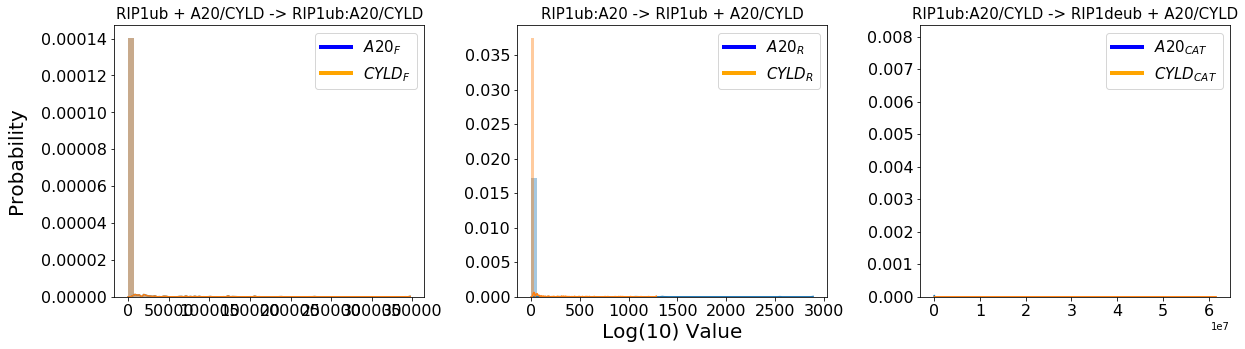

In [4]:
# fig = plt.figure(figsize=(20, 15))
# for i in range(1,41):
#     ax = fig.add_subplot(8, 5, i)
    # plt.plot(samples[:, counter])
# fig = plt.figure(figsize=(20, 5))
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
plt.subplot(131)
sns.distplot(clus3_100[:, 28])
sns.distplot(clus3_100[:, 31])
# plt.ylim(ymax=0.3)
# plt.xlim(xmin = -10,xmax=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.xticks(np.arange(-10, 11, 5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('RIP1ub + A20/CYLD -> RIP1ub:A20/CYLD',fontsize=15)
# plt.xlabel("Log(10) Value", fontsize=20)
plt.ylabel("Probability", fontsize=20, labelpad=15)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, [r'$A20_{F}$',r'$CYLD_{F}$'], prop={'size': 15}, loc = 'best')
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
plt.subplot(132)
sns.distplot(clus3_100[:, 29])
sns.distplot(clus3_100[:, 32])
# plt.ylim(ymax=0.3)
# plt.xlim(xmin = -10,xmax=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.xticks(np.arange(-10, 11, 5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('RIP1ub:A20 -> RIP1ub + A20/CYLD', fontsize=15)
plt.xlabel("Log(10) Value", fontsize=20)
# plt.ylabel("Probability", fontsize=20, labelpad=15)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, [r'$A20_{R}$',r'$CYLD_{R}$'], prop={'size': 15}, loc = 'best')
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
plt.subplot(133)
sns.distplot(clus3_100[:, 30])
sns.distplot(clus3_100[:, 33])
# plt.ylim(ymax=0.3)
# plt.xlim(xmin = -10,xmax=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.xticks(np.arange(-10, 11, 5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('RIP1ub:A20/CYLD -> RIP1deub + A20/CYLD',fontsize=15)
# plt.xlabel("Log(10) Value", fontsize=17)
# plt.ylabel("Probability", fontsize=20, labelpad=15)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, [r'$A20_{CAT}$',r'$CYLD_{CAT}$'], prop={'size': 15}, loc = 'best')
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
plt.ylim(ymax = 0.001)
# plt.text(0.5, 0.04, 'common X', ha='center')
# plt.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
# plt.xlabel("Log(10) Value", fontsize=14)
# plt.ylabel("Probability", fontsize=14, labelpad=15)
# plt.savefig('updatedkos/necro_5720_pydream_posta20cyldpardists_allchains5.pdf', format='pdf')
# plt.savefig("updatedkos/necro_5720_pydream_posta20cyldpardists_allchains5.pdf")
# fig.savefig("updatedkos/necro_5720_pydream_posta20cyldpardists_allchains5.pdf")
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0

scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
# counter = 0
n = 50000

ndims = len(idx)

fig = plt.figure(figsize=(20, 15))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]), color = 'red')
    sns.distplot(clus0_100[:, 14:][:, counter], color = 'cyan')
    plt.title(model100.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
    plt.ylim(ymax=0.65)
    plt.xlim(xmin = -10,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [5]:
tspan = np.linspace(0, 1800, 500)
m = model100.components

In [ ]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(initials = {m.TNF(brec=None): 233},param_values=clus0_100, num_processors = 20)
# wtclus0.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c0parsmod_30hrwt.h5',include_obs_exprs = True)
c0df100wt = wtclus0.dataframe

In [ ]:
plt.figure()
for n in range(len(clus0_100)):
    plt.plot(tspan/60, c0df100wt.loc[n]['MLKLa_obs'].iloc[:], lw=1.5, color ='blue', zorder = 1, alpha = 0.5)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
# plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()      

In [ ]:
solverwt1 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus1 = solverwt1.run(initials = {m.TNF(brec=None): 233},param_values=clus1_100, num_processors = 20)
# wtclus1.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c1parsmod_30hrwt.h5',include_obs_exprs = True)
c1df100wt = wtclus1.dataframe

In [ ]:
c1df100wt['MLKLa_obs'].shape

In [ ]:
plt.figure()
sns.histplot(data = c1df100wt['MLKLa_obs'], bins=27) # kde=False, norm_hist=True, color='b')
plt.xlabel(" time [minutes]", labelpad=14)
plt.ylabel("frequency", labelpad=14)
plt.show()

In [ ]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm")

In [ ]:
plt.figure()
for n in range(len(clus1_100)):
    plt.plot(tspan/60, c1df100wt.loc[n]['MLKLa_obs'].iloc[:], lw=1.5, color ='blue', zorder = 1, alpha = 0.5)
plt.show()    

In [ ]:
solverwt2 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus2 = solverwt2.run(initials = {m.TNF(brec=None): 233},param_values=clus2_100)
# wtclus2.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c2parsmod_30hrwt.h5',include_obs_exprs = True)
c2df100wt = wtclus2.dataframe

In [ ]:
plt.figure()
for n in range(len(clus2_100)):
    plt.plot(tspan/60, c2df100wt.loc[n]['MLKLa_obs'].iloc[:], lw=1.5, color ='blue', zorder = 1, alpha = 0.5)
plt.show()   

In [22]:
solverwt3 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus3 = solverwt3.run(initials = {m.TNF(brec=None): 2326, m.RIP3(bRHIM=None, bDD = None, state='unmod'):3196},
                        param_values=clus3_100, num_processors = 20)
# wtclus3.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c3parsmod_30hrwt.h5',include_obs_exprs = True)
c3df100wt = wtclus3.dataframe

2021-07-30 08:17:18.964 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-07-30 08:17:18.976 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-07-30 08:17:19.045 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-07-30 08:17:19.239 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-07-30 08:20:02.384 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-07-30 08:20:02.386 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-07-30 08:20:04.028 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


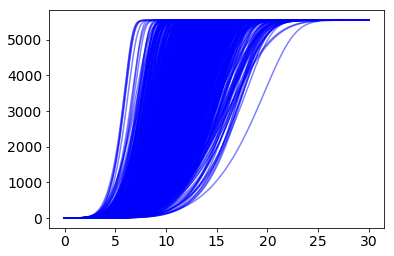

In [23]:
plt.figure()
for n in range(len(clus3_100)):
    plt.plot(tspan/60, c3df100wt.loc[n]['MLKLa_obs'].iloc[:], lw=1.5, color ='blue', zorder = 1, alpha = 0.5)
plt.show()

In [33]:
df1 = c3df100wt['MLKLa_obs']
dft = c3df100wt['MLKLa_obs'].T

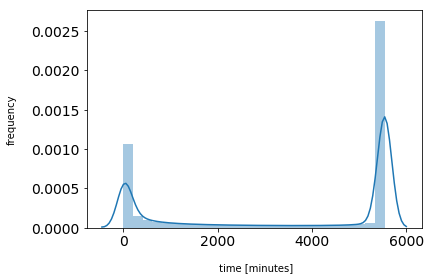

In [32]:
plt.figure()
a = sns.distplot(c3df100wt['MLKLa_obs'], bins=27) # kde=False, norm_hist=True, color='b')
plt.xlabel(" time [minutes]", labelpad=14)
plt.ylabel("frequency", labelpad=14)
plt.show()

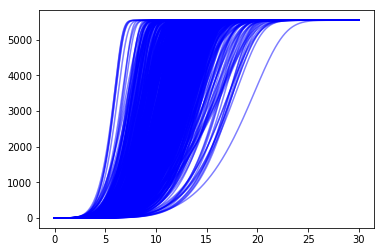

In [7]:
plt.figure()
for n in range(len(clus3_100)):
    plt.plot(tspan/60, c3df100wt.loc[n]['MLKLa_obs'].iloc[:], lw=1.5, color ='blue', zorder = 1, alpha = 0.5)
plt.show()   

In [8]:
solvera203 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
a20clus3 = solvera203.run(initials = {m.TNF(brec=None): 2326, m.A20(brip = None):0},
                         param_values=clus3_100, num_processors = 20)
# a20clus3.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c3parsmod_30hra20ko.h5',include_obs_exprs = True)
c3df100a20ko = a20clus3.dataframe

2021-07-29 14:47:09.118 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-07-29 14:47:09.123 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-07-29 14:47:09.156 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-07-29 14:47:09.318 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-07-29 14:49:52.621 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-07-29 14:49:52.623 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-07-29 14:49:54.411 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


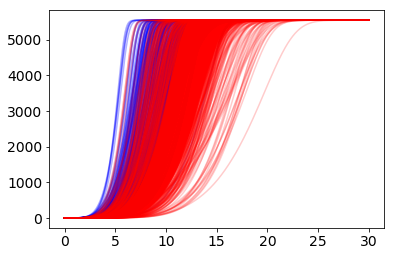

In [20]:
plt.figure()
for n in range(len(clus3_100)):
    plt.plot(tspan/60, c3df100a20ko.loc[n]['MLKLa_obs'].iloc[:], lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    plt.plot(tspan/60, c3df100wt.loc[n]['MLKLa_obs'].iloc[:], lw=1.5, color ='red', zorder = 2, alpha = 0.2)
plt.show()   

In [10]:
solvera203 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
a20clus3 = solvera203.run(initials = {m.TNF(brec=None): 2326, m.A20(brip = None):900000},
                         param_values=clus3_100, num_processors = 20)
# a20clus3.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c3parsmod_30hra20ko.h5',include_obs_exprs = True)
c3df100a20oe = a20clus3.dataframe

2021-07-29 14:50:05.782 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-07-29 14:50:05.787 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-07-29 14:50:05.820 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-07-29 14:50:05.982 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-07-29 14:52:47.783 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-07-29 14:52:47.786 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-07-29 14:52:49.389 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


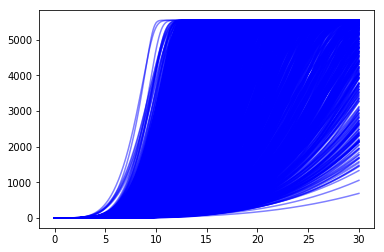

In [11]:
plt.figure()
for n in range(len(clus3_100)):
    plt.plot(tspan/60, c3df100a20oe.loc[n]['MLKLa_obs'].iloc[:], lw=1.5, color ='blue', zorder = 1, alpha = 0.5)
plt.show() 

In [12]:
solvercyld3 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3 = solvercyld3.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_100, num_processors = 20)
# cyldclus3.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c3parsmod_30hrcyldko.h5',include_obs_exprs = True)
c3df100cyldko = cyldclus3.dataframe

2021-07-29 15:07:17.131 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-07-29 15:07:17.143 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-07-29 15:07:17.211 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-07-29 15:07:17.407 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-07-29 15:10:00.052 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-07-29 15:10:00.055 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-07-29 15:10:01.680 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


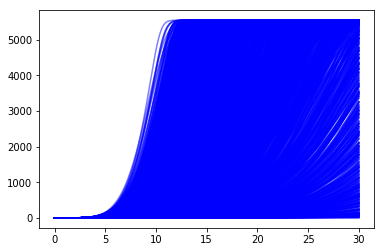

In [13]:
plt.figure()
for n in range(len(clus3_100)):
    plt.plot(tspan/60, c3df100cyldko.loc[n]['MLKLa_obs'].iloc[:], lw=1.5, color ='blue', zorder = 1, alpha = 0.5)
plt.show() 

In [14]:
solvercyld3 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3 = solvercyld3.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):900000},
                         param_values=clus3_100, num_processors = 20)
# cyldclus3.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c3parsmod_30hrcyldko.h5',include_obs_exprs = True)
c3df100cyldoe = cyldclus3.dataframe

2021-07-29 15:10:13.205 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-07-29 15:10:13.210 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-07-29 15:10:13.243 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-07-29 15:10:13.404 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-07-29 15:12:56.185 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-07-29 15:12:56.187 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-07-29 15:12:57.840 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


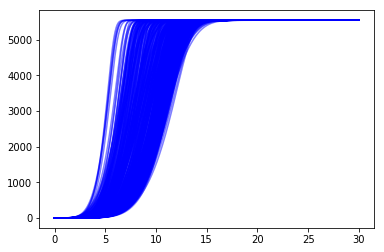

In [15]:
plt.figure()
for n in range(len(clus3_100)):
    plt.plot(tspan/60, c3df100cyldoe.loc[n]['MLKLa_obs'].iloc[:], lw=1.5, color ='blue', zorder = 1, alpha = 0.5)
plt.show() 

In [16]:
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, .98])

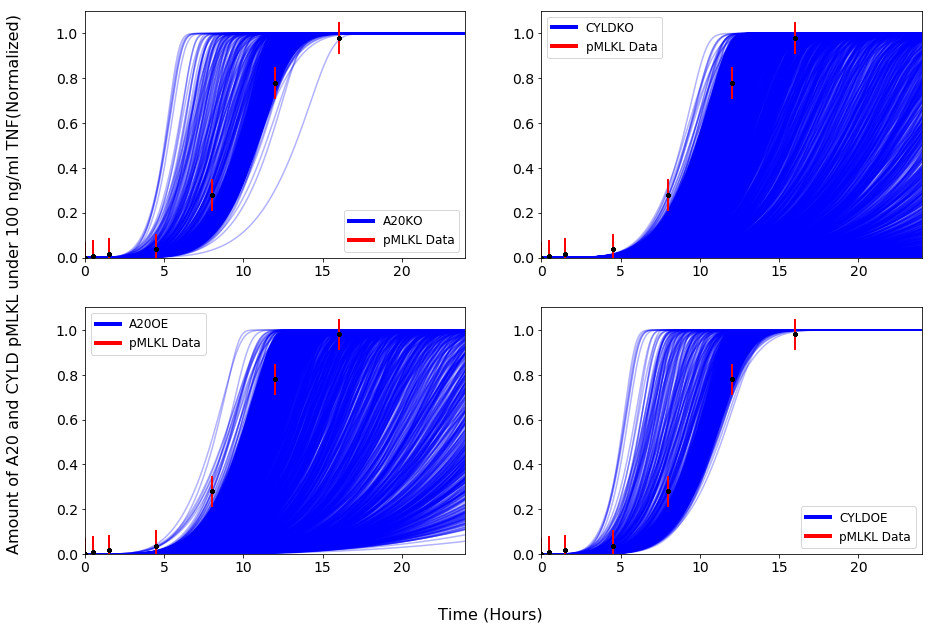

In [18]:
import matplotlib
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
# tspan = np.linspace(0, 1440, 300)
for n in range(len(clus3_100)):
#     ax1.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label ='50% pMLKL')
    ax1.plot(tspan/60, c3df100a20ko.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='blue', zorder = 1, alpha = 0.2)
    ax1.plot(tspan/60, c3df100wt.loc[n]['MLKLa_obs'].iloc[:], lw=1.5, color ='red', zorder = 2, alpha = 0.5)

    ax1.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    ax1.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    plt.legend(['A20KO'], loc = 'best', fontsize = 14)
#     plt.ylim(ymax = 5544, ymin =0)
#     plt.xlim(xmax = 1440, xmin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.set_xlim(xmin = 0, xmax = 24)
    ax1.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax1.legend(custom_lines, ['A20KO', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
# tspan2 = np.linspace(0, 2160, 300)    
for n in range(len(clus3_100)):
#     ax2.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label= '50% pMLKL')
    ax2.plot(tspan/60, c3df100cyldko.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='blue', zorder = 1, alpha = 0.2)
    ax2.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    ax2.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.set_xlim(xmin = 0, xmax = 24)
    ax2.set_ylim(ymin = 0)
    ax2.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax2.legend(custom_lines, ['CYLDKO', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
for n in range(len(clus2_100)):
#     ax3.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label ='50% pMLKL')
    ax3.plot(tspan/60, c3df100a20oe.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='blue', zorder = 1, alpha = 0.2)  
    ax3.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    ax3.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.set_xlim(xmin = 0, xmax = 24)
    ax3.set_ylim(ymin = 0)
    ax3.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax3.legend(custom_lines, ['A20OE', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
for n in range(len(clus3_100)):
    plt.plot(tspan/60, c3df100cyldoe.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='blue', zorder = 1, alpha = 0.2)
    ax4.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    ax4.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
#     plt.xlabel("Time (in hr)", fontsize=15)
#     plt.ylabel("Amount (normalized)", fontsize=15)
    ax4.set_xlim(xmin = 0, xmax = 24)
    ax4.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax4.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax4.legend(custom_lines, ['CYLDOE', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
 
fig.text(0.5, 0.04, 'Time (Hours)', ha='center', va='center',fontsize = 16)
fig.text(0.06, 0.5, 'Amount of A20 and CYLD pMLKL under 100 ng/ml TNF(Normalized)',
         ha='center', va='center', rotation='vertical', fontsize = 16)
# plt.savefig('pmlkl_100tnf_4clus_5720_A20KO.pdf')
plt.show()

In [24]:
for i,sp in enumerate(np.linspace(0, 1800, 500)):
    print(i,":",sp)

0 : 0.0
1 : 3.6072144288577155
2 : 7.214428857715431
3 : 10.821643286573146
4 : 14.428857715430862
5 : 18.03607214428858
6 : 21.64328657314629
7 : 25.250501002004007
8 : 28.857715430861724
9 : 32.46492985971944
10 : 36.07214428857716
11 : 39.67935871743487
12 : 43.28657314629258
13 : 46.8937875751503
14 : 50.501002004008015
15 : 54.10821643286573
16 : 57.71543086172345
17 : 61.322645290581164
18 : 64.92985971943888
19 : 68.5370741482966
20 : 72.14428857715431
21 : 75.75150300601203
22 : 79.35871743486975
23 : 82.96593186372746
24 : 86.57314629258516
25 : 90.18036072144288
26 : 93.7875751503006
27 : 97.39478957915831
28 : 101.00200400801603
29 : 104.60921843687375
30 : 108.21643286573146
31 : 111.82364729458918
32 : 115.4308617234469
33 : 119.03807615230461
34 : 122.64529058116233
35 : 126.25250501002004
36 : 129.85971943887776
37 : 133.46693386773546
38 : 137.0741482965932
39 : 140.6813627254509
40 : 144.28857715430863
41 : 147.89579158316633
42 : 151.50300601202406
43 : 155.1102204408

In [ ]:
sim_idx_to_keep = [idx for idx in range(len(clus3_100)) if c3df100a20ko['MLKLa_obs'][idx].iloc[-200] < 2772]
print(sim_idx_to_keep)

In [38]:
print(len(clus3_100))

2822


In [67]:
sim_idx_600_800 = [idx for idx in range(len(clus3_100)) if c3df100cyldko['MLKLa_obs'][idx].iloc[167] <= 2772
                  and c3df100cyldko['MLKLa_obs'][idx].iloc[222] >= 2772]
sim_idx_600_8001 = [idx for idx in range(len(clus3_100)) if c3df100cyldko['MLKLa_obs'][idx].iloc[167] <= 2772
                  and c3df100cyldko['MLKLa_obs'][idx].iloc[222] >= 2772]
sim_idx_600_8002 = [idx for idx in range(len(clus3_100)) if c3df100cyldko['MLKLa_obs'][idx].iloc[167] <= 2772
                  and c3df100cyldko['MLKLa_obs'][idx].iloc[222] >= 2772]
sim_idx_600_8003 = [idx for idx in range(len(clus3_100)) if c3df100cyldko['MLKLa_obs'][idx].iloc[167] <= 2772
                  and c3df100cyldko['MLKLa_obs'][idx].iloc[222] >= 2772]
sim_idx_600_8004 = [idx for idx in range(len(clus3_100)) if c3df100cyldko['MLKLa_obs'][idx].iloc[167] <= 2772
                  and c3df100cyldko['MLKLa_obs'][idx].iloc[222] >= 2772]

sim_idx_800_1000 = [idx for idx in range(len(clus3_100)) if c3df100cyldko['MLKLa_obs'][idx].iloc[222] <= 2772 
                     and c3df100cyldko['MLKLa_obs'][idx].iloc[278] >= 2772]
sim_idx_1000_1200 = [idx for idx in range(len(clus3_100)) if c3df100cyldko['MLKLa_obs'][idx].iloc[278] <= 2772 
                     and c3df100cyldko['MLKLa_obs'][idx].iloc[333] >= 2772]
sim_idx_1200_1400 = [idx for idx in range(len(clus3_100)) if c3df100cyldko['MLKLa_obs'][idx].iloc[333] <= 2772 
                     and c3df100cyldko['MLKLa_obs'][idx].iloc[389] >= 2772]
sim_idx_1400_1600 = [idx for idx in range(len(clus3_100)) if c3df100cyldko['MLKLa_obs'][idx].iloc[389] <= 2772 
                     and c3df100cyldko['MLKLa_obs'][idx].iloc[444] >= 2772]
sim_idx_1600_1800 = [idx for idx in range(len(clus3_100)) if c3df100cyldko['MLKLa_obs'][idx].iloc[444] <= 2772] 
#                      and c3df100cyldko['MLKLa_obs'][idx].iloc[499] >= 2772]
print(len(sim_idx_600_800))
print(len(sim_idx_800_1000))
print(len(sim_idx_1000_1200))
print(len(sim_idx_1200_1400))
print(len(sim_idx_1400_1600))
print(len(sim_idx_1600_1800))

1265
382
263
255
155
385


In [176]:
clus3_100e = np.load('necro_pars10k_cluster31_5720_modsplit.npy')[27]
clus3_100m = np.load('necro_pars10k_cluster32_5720_modsplit.npy')[27]
clus3_100d = np.load('necro_pars10k_cluster33_5720_modsplit.npy')[116]

In [50]:
for i,p in enumerate(model100.parameters):
    print(i,":",p)

0 : Parameter('TNF_0', 2326.0)
1 : Parameter('TNFR_0', 4800.0)
2 : Parameter('TRADD_0', 4696.0)
3 : Parameter('RIP1_0', 40000.0)
4 : Parameter('TRAF_0', 11776.0)
5 : Parameter('cIAP_0', 9000.0)
6 : Parameter('A20_0', 9000.0)
7 : Parameter('CYLD_0', 9000.0)
8 : Parameter('FADD_0', 3109.0)
9 : Parameter('flip_L_0', 3900.0)
10 : Parameter('Lubac_0', 7226.0)
11 : Parameter('C8_0', 3799.0)
12 : Parameter('RIP3_0', 10654.0)
13 : Parameter('MLKLa_0', 5544.0)
14 : Parameter('p1f', 1e-06)
15 : Parameter('p1r', 0.001)
16 : Parameter('p2f', 0.001)
17 : Parameter('p3f', 1e-06)
18 : Parameter('p3r', 0.001)
19 : Parameter('p4f', 1e-06)
20 : Parameter('p4r', 0.001)
21 : Parameter('p5f', 1e-06)
22 : Parameter('p5r', 0.001)
23 : Parameter('p6f', 1e-06)
24 : Parameter('p6r', 0.001)
25 : Parameter('p7f', 0.1)
26 : Parameter('p8f', 1e-06)
27 : Parameter('p8r', 0.001)
28 : Parameter('p9f', 1e-06)
29 : Parameter('p9r', 0.001)
30 : Parameter('p10f', 0.1)
31 : Parameter('p11f', 1e-06)
32 : Parameter('p11r', 0

In [51]:
g = 30

In [123]:
np.save('necro_pars10k_mode4_600_800_5720_modsplit.npy',clus3_100[sim_idx_600_800][:][:,:])
np.save('necro_pars10k_mode4_800_1000_5720_modsplit.npy',clus3_100[sim_idx_800_1000][:][:,:])
np.save('necro_pars10k_mode4_1000_1200_5720_modsplit.npy',clus3_100[sim_idx_1000_1200][:][:,:])
np.save('necro_pars10k_mode4_1200_1400_5720_modsplit.npy',clus3_100[sim_idx_1200_1400][:][:,:])
np.save('necro_pars10k_mode4_1400_1600_5720_modsplit.npy',clus3_100[sim_idx_1400_1600][:][:,:])
np.save('necro_pars10k_mode4_1600_1800_5720_modsplit.npy',clus3_100[sim_idx_1600_1800][:][:,:])

In [94]:
clus3_600_800 = np.load('necro_pars10k_mode4_600_800_5720_modsplit.npy')
clus3_600_8001 = np.load('necro_pars10k_mode4_600_800_5720_modsplit.npy')
clus3_600_8002 = np.load('necro_pars10k_mode4_600_800_5720_modsplit.npy')
clus3_600_8003 = np.load('necro_pars10k_mode4_600_800_5720_modsplit.npy')
clus3_600_8004 = np.load('necro_pars10k_mode4_600_800_5720_modsplit.npy')

In [124]:
clus3_800_1000 = np.load('necro_pars10k_mode4_800_1000_5720_modsplit.npy')
clus3_800_10001 = np.load('necro_pars10k_mode4_800_1000_5720_modsplit.npy')
clus3_800_10002 = np.load('necro_pars10k_mode4_800_1000_5720_modsplit.npy')
clus3_800_10003 = np.load('necro_pars10k_mode4_800_1000_5720_modsplit.npy')
clus3_800_10004 = np.load('necro_pars10k_mode4_800_1000_5720_modsplit.npy')

In [133]:
clus3_1000_1200 = np.load('necro_pars10k_mode4_1000_1200_5720_modsplit.npy')
clus3_1000_12001 = np.load('necro_pars10k_mode4_1000_1200_5720_modsplit.npy')
clus3_1000_12002 = np.load('necro_pars10k_mode4_1000_1200_5720_modsplit.npy')
clus3_1000_12003 = np.load('necro_pars10k_mode4_1000_1200_5720_modsplit.npy')
clus3_1000_12004 = np.load('necro_pars10k_mode4_1000_1200_5720_modsplit.npy')

In [134]:
clus3_1200_1400 = np.load('necro_pars10k_mode4_1200_1400_5720_modsplit.npy')
clus3_1200_14001 = np.load('necro_pars10k_mode4_1200_1400_5720_modsplit.npy')
clus3_1200_14002 = np.load('necro_pars10k_mode4_1200_1400_5720_modsplit.npy')
clus3_1200_14003 = np.load('necro_pars10k_mode4_1200_1400_5720_modsplit.npy')
clus3_1200_14004 = np.load('necro_pars10k_mode4_1200_1400_5720_modsplit.npy')

In [135]:
clus3_1400_1600 = np.load('necro_pars10k_mode4_1400_1600_5720_modsplit.npy')
clus3_1400_16001 = np.load('necro_pars10k_mode4_1400_1600_5720_modsplit.npy')
clus3_1400_16002 = np.load('necro_pars10k_mode4_1400_1600_5720_modsplit.npy')
clus3_1400_16003 = np.load('necro_pars10k_mode4_1400_1600_5720_modsplit.npy')
clus3_1400_16004 = np.load('necro_pars10k_mode4_1400_1600_5720_modsplit.npy')

In [136]:
clus3_1600_1800 = np.load('necro_pars10k_mode4_1600_1800_5720_modsplit.npy')
clus3_1600_18001 = np.load('necro_pars10k_mode4_1600_1800_5720_modsplit.npy')
clus3_1600_18002 = np.load('necro_pars10k_mode4_1600_1800_5720_modsplit.npy')
clus3_1600_18003 = np.load('necro_pars10k_mode4_1600_1800_5720_modsplit.npy')
clus3_1600_18004 = np.load('necro_pars10k_mode4_1600_1800_5720_modsplit.npy')

In [137]:
clus3_600_8001[:][:,g] = clus3_600_8001[:][:,g]*10
clus3_600_8002[:][:,g] = clus3_600_8002[:][:,g]*100
clus3_600_8003[:][:,g] = clus3_600_8003[:][:,g]*1000
clus3_600_8004[:][:,g] = clus3_600_8004[:][:,g]*10000

clus3_800_10001[:][:,g] = clus3_800_10001[:][:,g]*10
clus3_800_10002[:][:,g] = clus3_800_10002[:][:,g]*100
clus3_800_10003[:][:,g] = clus3_800_10003[:][:,g]*1000
clus3_800_10004[:][:,g] = clus3_800_10004[:][:,g]*10000

clus3_1000_12001[:][:,g] = clus3_1000_12001[:][:,g]*10
clus3_1000_12002[:][:,g] = clus3_1000_12002[:][:,g]*100
clus3_1000_12003[:][:,g] = clus3_1000_12003[:][:,g]*1000
clus3_1000_12004[:][:,g] = clus3_1000_12004[:][:,g]*10000

clus3_1200_14001[:][:,g] = clus3_1200_14001[:][:,g]*10
clus3_1200_14002[:][:,g] = clus3_1200_14002[:][:,g]*100
clus3_1200_14003[:][:,g] = clus3_1200_14003[:][:,g]*1000
clus3_1200_14004[:][:,g] = clus3_1200_14004[:][:,g]*10000

clus3_1400_16001[:][:,g] = clus3_1400_16001[:][:,g]*10
clus3_1400_16002[:][:,g] = clus3_1400_16002[:][:,g]*100
clus3_1400_16003[:][:,g] = clus3_1400_16003[:][:,g]*1000
clus3_1400_16004[:][:,g] = clus3_1400_16004[:][:,g]*10000

clus3_1600_18001[:][:,g] = clus3_1600_18001[:][:,g]*10
clus3_1600_18002[:][:,g] = clus3_1600_18002[:][:,g]*100
clus3_1600_18003[:][:,g] = clus3_1600_18003[:][:,g]*1000
clus3_1600_18004[:][:,g] = clus3_1600_18004[:][:,g]*10000

In [192]:
clus3_100d1

1.4719729773262927e-05

In [194]:
clus3_100d = np.load('necro_pars10k_cluster33_5720_modsplit.npy')[116]
clus3_100d1 = np.load('necro_pars10k_cluster33_5720_modsplit.npy')[116]
clus3_100d2 = np.load('necro_pars10k_cluster33_5720_modsplit.npy')[116]
clus3_100d3 = np.load('necro_pars10k_cluster33_5720_modsplit.npy')[116]
clus3_100d4 = np.load('necro_pars10k_cluster33_5720_modsplit.npy')[116]

clus3_100d1[g] = clus3_100d1[g]*10
clus3_100d2[g] = clus3_100d2[g]*100
clus3_100d3[g] = clus3_100d3[g]*1000
clus3_100d4[g] = clus3_100d4[g]*10000

In [180]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326},
                         param_values=clus3_100[38], num_processors = 20)
c3df100cyldsim6wt = cyldclus3sim6.dataframe

2021-08-04 13:40:24.492 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-04 13:40:24.504 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-04 13:40:24.574 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-04 13:40:24.635 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-04 13:40:26.142 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-04 13:40:26.144 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-04 13:40:26.204 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [182]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_100[38], num_processors = 20)
c3df100cyldsim6ko = cyldclus3sim6.dataframe

2021-08-04 13:40:32.515 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-04 13:40:32.526 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-04 13:40:32.593 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-04 13:40:32.828 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-04 13:40:34.354 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-04 13:40:34.355 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-04 13:40:34.416 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


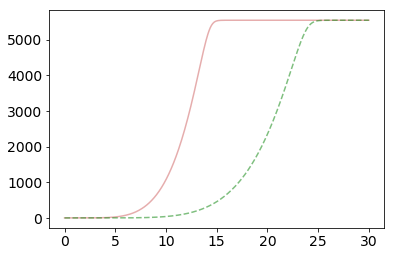

In [183]:
plt.figure()
plt.plot(tspan/60, c3df100cyldsim6wt['MLKLa_obs'].iloc[:], lw=1.5, color ='indianred', zorder = 1, alpha = 0.5)
plt.plot(tspan/60, c3df100cyldsim6ko['MLKLa_obs'].iloc[:], lw=1.5, color ='green', zorder = 1, linestyle = '--',alpha = 0.5)
plt.show() 

In [52]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_100[sim_idx_600_800], num_processors = 20)
c3df100cyldsim6 = cyldclus3sim6.dataframe

2021-08-02 18:47:57.199 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-02 18:47:57.212 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-02 18:47:57.282 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-02 18:47:57.404 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-02 18:48:41.216 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-02 18:48:41.217 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-02 18:48:41.963 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


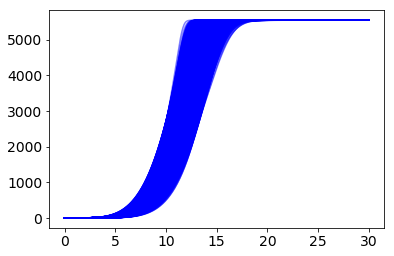

In [65]:
plt.figure()
for n in range(len(clus3_100[sim_idx_600_800])):
    plt.plot(tspan/60, c3df100cyldsim6.loc[n]['MLKLa_obs'].iloc[:], lw=1.5, color ='blue', zorder = 1, alpha = 0.5)
plt.show() 

In [97]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_600_8001, num_processors = 20)
c3df100cyldsim61 = cyldclus3sim6.dataframe

2021-08-02 21:05:15.941 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-02 21:05:15.952 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-02 21:05:16.019 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-02 21:05:16.139 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-02 21:06:00.886 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-02 21:06:00.888 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-02 21:06:01.615 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [98]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_600_8002, num_processors = 20)
c3df100cyldsim62 = cyldclus3sim6.dataframe

2021-08-02 21:06:02.668 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-02 21:06:02.675 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-02 21:06:02.710 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-02 21:06:02.801 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-02 21:06:47.818 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-02 21:06:47.819 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-02 21:06:48.522 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [99]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_600_8003, num_processors = 20)
c3df100cyldsim63 = cyldclus3sim6.dataframe

2021-08-02 21:06:49.588 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-02 21:06:49.594 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-02 21:06:49.629 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-02 21:06:49.723 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-02 21:07:34.124 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-02 21:07:34.126 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-02 21:07:34.893 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [100]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_600_8004, num_processors = 20)
c3df100cyldsim64 = cyldclus3sim6.dataframe

2021-08-02 21:07:35.949 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-02 21:07:35.954 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-02 21:07:35.988 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-02 21:07:36.078 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-02 21:08:20.013 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-02 21:08:20.014 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-02 21:08:20.698 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


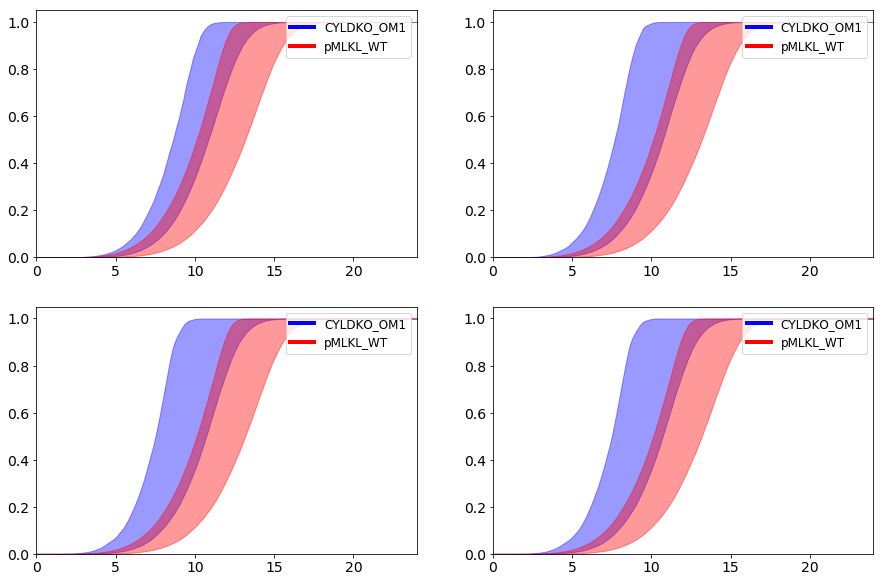

In [122]:
df1 = pd.concat([c3df100cyldsim61/5544, c3df100cyldsim6/5544],
               keys=['OM1', 'WT'],
               names=['group', 'simulation', 'time'])
df2 = pd.concat([c3df100cyldsim62/5544, c3df100cyldsim6/5544],
               keys=['OM2', 'WT'],
               names=['group', 'simulation', 'time'])
df3 = pd.concat([c3df100cyldsim63/5544, c3df100cyldsim6/5544],
               keys=['OM3', 'WT'],
               names=['group', 'simulation', 'time'])
df4 = pd.concat([c3df100cyldsim64/5544, c3df100cyldsim6/5544],
               keys=['OM4', 'WT'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot1 = {
    ('MLKLa_obs', 'OM1'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
obs_to_plot2 = {
    ('MLKLa_obs', 'OM2'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
obs_to_plot3 = {
    ('MLKLa_obs', 'OM3'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
obs_to_plot4 = {
    ('MLKLa_obs', 'OM4'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
lower_quantile = 0.02  # 10%
upper_quantile = .97  # 90%
median = 0.5
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
for obs_pair, colour in obs_to_plot1.items():
    obs, group = obs_pair
    quantile_data = df1[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax1.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.set_xlim(xmin = 0, xmax = 24)
    ax1.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax1.legend(custom_lines, ['CYLDKO_OM1', 'pMLKL_WT'], prop={'size': 12}, loc = 'best')

for obs_pair, colour in obs_to_plot2.items():
    obs, group = obs_pair
    quantile_data = df2[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax2.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.set_xlim(xmin = 0, xmax = 24)
    ax2.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax2.legend(custom_lines, ['CYLDKO_OM1', 'pMLKL_WT'], prop={'size': 12}, loc = 'best')
    
for obs_pair, colour in obs_to_plot3.items():
    obs, group = obs_pair
    quantile_data = df3[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax3.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.set_xlim(xmin = 0, xmax = 24)
    ax3.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax3.legend(custom_lines, ['CYLDKO_OM1', 'pMLKL_WT'], prop={'size': 12}, loc = 'best')

for obs_pair, colour in obs_to_plot4.items():
    obs, group = obs_pair
    quantile_data = df4[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax4.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax4.set_xlim(xmin = 0, xmax = 24)
    ax4.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax4.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax4.legend(custom_lines, ['CYLDKO_OM1', 'pMLKL_WT'], prop={'size': 12}, loc = 'best')
    
# matplotlib.rc('xtick', labelsize=14) 
# matplotlib.rc('ytick', labelsize=14) 
# plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
# plt.xlabel('Time (hours)', fontsize = 14) # X label
# plt.xlim(xmax =24)
# plt.ylim(ymin = 1e-3, ymax = 1.009)
# plt.tight_layout()
# custom_lines = [Line2D([0], [0], color='blue', lw=4)]
# plt.legend(custom_lines, ['pMLKL'], prop={'size': 10}, loc = 'best')
# plt.savefig("necro_10k_5720_wdatac3_tnf100.pdf")
plt.show()

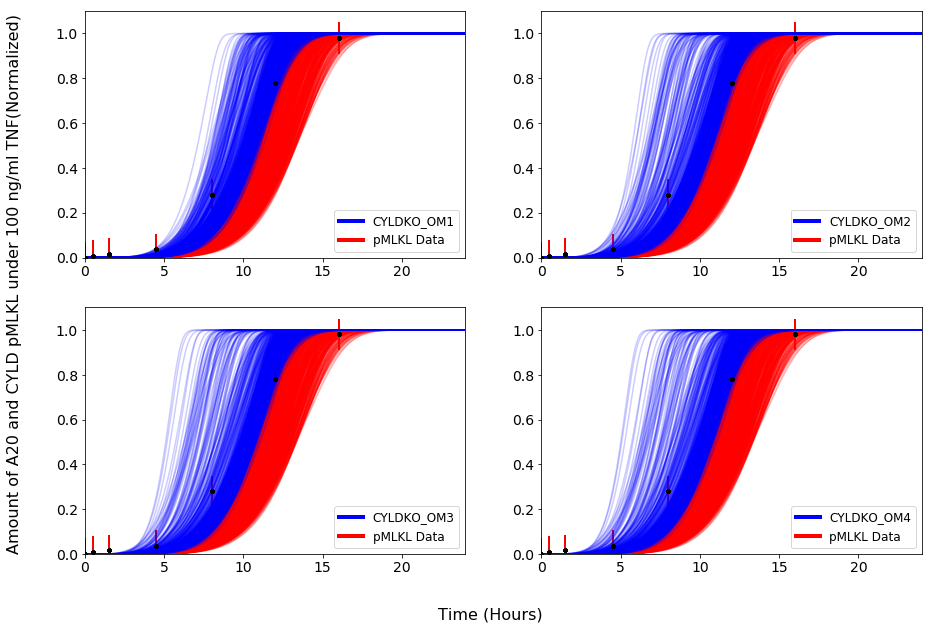

In [108]:
import matplotlib
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
for n in range(len(clus3_100[sim_idx_600_8001])):
    ax1.plot(tspan/60, c3df100cyldsim61.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='blue', zorder = 2, alpha = 0.2)
    ax1.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    ax1.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
#     plt.legend(['A20KO'], loc = 'best', fontsize = 14)
#     plt.ylim(ymax = 5544, ymin =0)
#     plt.xlim(xmax = 1440, xmin = 0)
    ax1.plot(tspan/60, c3df100cyldsim6.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='red', zorder = 1, alpha = 0.2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.set_xlim(xmin = 0, xmax = 24)
    ax1.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax1.legend(custom_lines, ['CYLDKO_OM1', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
# tspan2 = np.linspace(0, 2160, 300)    
for n in range(len(clus3_100[sim_idx_600_8002])):
#     ax2.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label= '50% pMLKL')
    ax2.plot(tspan/60, c3df100cyldsim62.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='blue', zorder = 2, alpha = 0.2)
    ax2.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    ax2.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    ax2.plot(tspan/60, c3df100cyldsim6.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='red', zorder = 1, alpha = 0.2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.set_xlim(xmin = 0, xmax = 24)
    ax2.set_ylim(ymin = 0)
    ax2.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax2.legend(custom_lines, ['CYLDKO_OM2', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
for n in range(len(clus3_100[sim_idx_600_8003])):
#     ax3.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label ='50% pMLKL')
    ax3.plot(tspan/60, c3df100cyldsim63.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='blue', zorder = 2, alpha = 0.2)  
    ax3.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    ax3.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    ax3.plot(tspan/60, c3df100cyldsim6.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='red', zorder = 1, alpha = 0.2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.set_xlim(xmin = 0, xmax = 24)
    ax3.set_ylim(ymin = 0)
    ax3.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax3.legend(custom_lines, ['CYLDKO_OM3', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
for n in range(len(clus3_100[sim_idx_600_8004])):
    plt.plot(tspan/60, c3df100cyldsim64.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='blue', zorder = 2, alpha = 0.2)
    ax4.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    ax4.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    ax4.plot(tspan/60, c3df100cyldsim6.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='red', zorder = 1, alpha = 0.2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
#     plt.xlabel("Time (in hr)", fontsize=15)
#     plt.ylabel("Amount (normalized)", fontsize=15)
    ax4.set_xlim(xmin = 0, xmax = 24)
    ax4.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax4.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax4.legend(custom_lines, ['CYLDKO_OM4', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
 
fig.text(0.5, 0.04, 'Time (Hours)', ha='center', va='center',fontsize = 16)
fig.text(0.06, 0.5, 'Amount of A20 and CYLD pMLKL under 100 ng/ml TNF(Normalized)',
         ha='center', va='center', rotation='vertical', fontsize = 16)
# plt.savefig('pmlkl_100tnf_4clus_5720_A20KO.pdf')
plt.show()

In [138]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_800_10001, num_processors = 20)
c3df100cyldsim81 = cyldclus3sim6.dataframe

2021-08-03 21:10:01.111 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-03 21:10:01.126 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-03 21:10:01.197 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-03 21:10:01.270 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-03 21:10:10.868 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-03 21:10:10.869 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-03 21:10:11.137 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [139]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_800_10002, num_processors = 20)
c3df100cyldsim82 = cyldclus3sim6.dataframe

2021-08-03 21:10:11.406 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-03 21:10:11.411 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-03 21:10:11.444 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-03 21:10:11.494 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-03 21:10:21.210 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-03 21:10:21.211 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-03 21:10:21.463 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [140]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_800_10003, num_processors = 20)
c3df100cyldsim83 = cyldclus3sim6.dataframe

2021-08-03 21:10:21.729 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-03 21:10:21.734 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-03 21:10:21.768 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-03 21:10:21.820 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-03 21:10:31.493 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-03 21:10:31.494 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-03 21:10:31.799 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [141]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_800_10004, num_processors = 20)
c3df100cyldsim84 = cyldclus3sim6.dataframe

2021-08-03 21:10:32.057 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-03 21:10:32.062 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-03 21:10:32.094 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-03 21:10:32.143 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-03 21:10:41.854 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-03 21:10:41.855 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-03 21:10:42.089 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


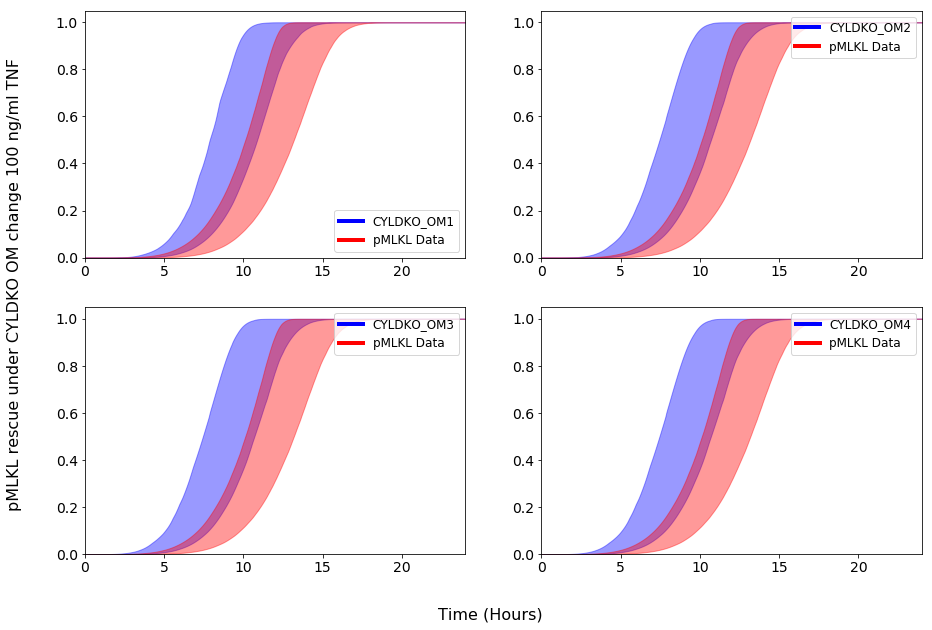

In [151]:
df1 = pd.concat([c3df100cyldsim81/5544, c3df100cyldsim6/5544],
               keys=['OM1', 'WT'],
               names=['group', 'simulation', 'time'])
df2 = pd.concat([c3df100cyldsim82/5544, c3df100cyldsim6/5544],
               keys=['OM2', 'WT'],
               names=['group', 'simulation', 'time'])
df3 = pd.concat([c3df100cyldsim83/5544, c3df100cyldsim6/5544],
               keys=['OM3', 'WT'],
               names=['group', 'simulation', 'time'])
df4 = pd.concat([c3df100cyldsim84/5544, c3df100cyldsim6/5544],
               keys=['OM4', 'WT'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot1 = {
    ('MLKLa_obs', 'OM1'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
obs_to_plot2 = {
    ('MLKLa_obs', 'OM2'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
obs_to_plot3 = {
    ('MLKLa_obs', 'OM3'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
obs_to_plot4 = {
    ('MLKLa_obs', 'OM4'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
lower_quantile = 0.02  # 10%
upper_quantile = .97  # 90%
median = 0.5
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
for obs_pair, colour in obs_to_plot1.items():
    obs, group = obs_pair
    quantile_data = df1[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax1.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.set_xlim(xmin = 0, xmax = 24)
    ax1.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax1.legend(custom_lines, ['CYLDKO_OM1', 'pMLKL Data'], prop={'size': 12}, loc = 'lower right')

for obs_pair, colour in obs_to_plot2.items():
    obs, group = obs_pair
    quantile_data = df2[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax2.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.set_xlim(xmin = 0, xmax = 24)
    ax2.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax2.legend(custom_lines, ['CYLDKO_OM2', 'pMLKL Data'], prop={'size': 12}, loc = 'lower right')
    
for obs_pair, colour in obs_to_plot3.items():
    obs, group = obs_pair
    quantile_data = df3[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax3.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.set_xlim(xmin = 0, xmax = 24)
    ax3.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax3.legend(custom_lines, ['CYLDKO_OM3', 'pMLKL Data'], prop={'size': 12}, loc = 'lower right')

for obs_pair, colour in obs_to_plot4.items():
    obs, group = obs_pair
    quantile_data = df4[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax4.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax4.set_xlim(xmin = 0, xmax = 24)
    ax4.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax4.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax4.legend(custom_lines, ['CYLDKO_OM4', 'pMLKL Data'], prop={'size': 12}, loc = 'lower right')
fig.text(0.5, 0.04, 'Time (Hours)', ha='center', va='center',fontsize = 16)
fig.text(0.06, 0.5, 'pMLKL rescue under CYLDKO OM change 100 ng/ml TNF',
         ha='center', va='center', rotation='vertical', fontsize = 16)
    # plt.savefig("necro_10k_5720_wdatac3_tnf100.pdf")
plt.show()

In [161]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_1000_12001, num_processors = 20)
c3df100cyldsim101 = cyldclus3sim6.dataframe

2021-08-04 12:00:44.180 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-04 12:00:44.191 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-04 12:00:44.260 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-04 12:00:44.325 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-04 12:00:50.861 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-04 12:00:50.862 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-04 12:00:51.042 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [162]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_1000_12002, num_processors = 20)
c3df100cyldsim102 = cyldclus3sim6.dataframe

2021-08-04 12:00:51.216 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-04 12:00:51.221 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-04 12:00:51.254 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-04 12:00:51.298 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-04 12:00:57.763 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-04 12:00:57.764 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-04 12:00:57.961 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [163]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_1000_12003, num_processors = 20)
c3df100cyldsim103 = cyldclus3sim6.dataframe

2021-08-04 12:00:58.210 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-04 12:00:58.215 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-04 12:00:58.250 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-04 12:00:58.294 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-04 12:01:05.318 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-04 12:01:05.320 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-04 12:01:05.496 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [164]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_1000_12004, num_processors = 20)
c3df100cyldsim104 = cyldclus3sim6.dataframe

2021-08-04 12:01:05.665 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-04 12:01:05.670 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-04 12:01:05.705 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-04 12:01:05.749 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-04 12:01:12.354 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-04 12:01:12.357 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-04 12:01:12.611 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


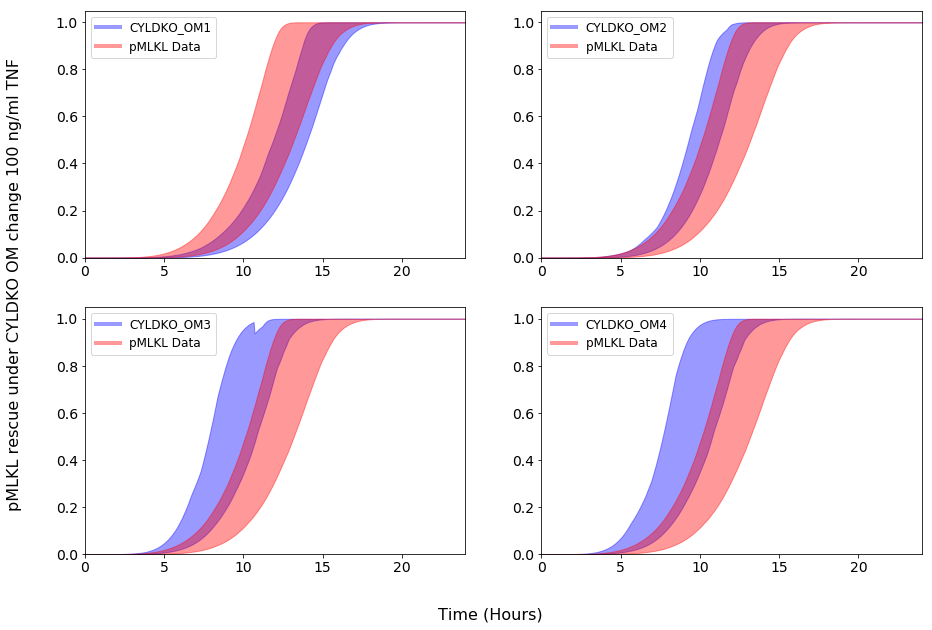

In [165]:
df1 = pd.concat([c3df100cyldsim101/5544, c3df100cyldsim6/5544],
               keys=['OM1', 'WT'],
               names=['group', 'simulation', 'time'])
df2 = pd.concat([c3df100cyldsim102/5544, c3df100cyldsim6/5544],
               keys=['OM2', 'WT'],
               names=['group', 'simulation', 'time'])
df3 = pd.concat([c3df100cyldsim103/5544, c3df100cyldsim6/5544],
               keys=['OM3', 'WT'],
               names=['group', 'simulation', 'time'])
df4 = pd.concat([c3df100cyldsim104/5544, c3df100cyldsim6/5544],
               keys=['OM4', 'WT'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot1 = {
    ('MLKLa_obs', 'OM1'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
obs_to_plot2 = {
    ('MLKLa_obs', 'OM2'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
obs_to_plot3 = {
    ('MLKLa_obs', 'OM3'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
obs_to_plot4 = {
    ('MLKLa_obs', 'OM4'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
lower_quantile = 0.02  # 10%
upper_quantile = .97  # 90%
median = 0.5
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
for obs_pair, colour in obs_to_plot1.items():
    obs, group = obs_pair
    quantile_data = df1[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax1.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.set_xlim(xmin = 0, xmax = 24)
    ax1.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4, alpha= 0.4),
                   Line2D([0], [0], color='red', lw=4, alpha = 0.4)]
    ax1.legend(custom_lines, ['CYLDKO_OM1', 'pMLKL Data'], prop={'size': 12}, loc = 'upper left')

for obs_pair, colour in obs_to_plot2.items():
    obs, group = obs_pair
    quantile_data = df2[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax2.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.set_xlim(xmin = 0, xmax = 24)
    ax2.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4, alpha= 0.4),
                   Line2D([0], [0], color='red', lw=4, alpha= 0.4)]
    ax2.legend(custom_lines, ['CYLDKO_OM2', 'pMLKL Data'], prop={'size': 12}, loc = 'upper left')
    
for obs_pair, colour in obs_to_plot3.items():
    obs, group = obs_pair
    quantile_data = df3[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax3.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.set_xlim(xmin = 0, xmax = 24)
    ax3.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4, alpha= 0.4),
                   Line2D([0], [0], color='red', lw=4, alpha= 0.4)]
    ax3.legend(custom_lines, ['CYLDKO_OM3', 'pMLKL Data'], prop={'size': 12}, loc = 'upper left')

for obs_pair, colour in obs_to_plot4.items():
    obs, group = obs_pair
    quantile_data = df4[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax4.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax4.set_xlim(xmin = 0, xmax = 24)
    ax4.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax4.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4, alpha= 0.4),
                   Line2D([0], [0], color='red', lw=4, alpha= 0.4)]
    ax4.legend(custom_lines, ['CYLDKO_OM4', 'pMLKL Data'], prop={'size': 12}, loc = 'upper left')
fig.text(0.5, 0.04, 'Time (Hours)', ha='center', va='center',fontsize = 16)
fig.text(0.06, 0.5, 'pMLKL rescue under CYLDKO OM change 100 ng/ml TNF',
         ha='center', va='center', rotation='vertical', fontsize = 16)
# matplotlib.rc('xtick', labelsize=14) 
# matplotlib.rc('ytick', labelsize=14) 
# plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
# plt.xlabel('Time (hours)', fontsize = 14) # X label
# plt.xlim(xmax =24)
# plt.ylim(ymin = 1e-3, ymax = 1.009)
# plt.tight_layout()
# custom_lines = [Line2D([0], [0], color='blue', lw=4)]
# plt.legend(custom_lines, ['pMLKL'], prop={'size': 10}, loc = 'best')
# plt.savefig("necro_10k_5720_mode4_pmlklrescue_cyldko_omchange_tnf100.pdf")
plt.show()

In [166]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_1200_14001, num_processors = 20)
c3df100cyldsim121 = cyldclus3sim6.dataframe

2021-08-04 12:01:20.564 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-04 12:01:20.569 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-04 12:01:20.605 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-04 12:01:20.649 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-04 12:01:27.541 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-04 12:01:27.542 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-04 12:01:27.799 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [167]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_1200_14002, num_processors = 20)
c3df100cyldsim122 = cyldclus3sim6.dataframe

2021-08-04 12:01:27.974 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-04 12:01:27.980 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-04 12:01:28.014 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-04 12:01:28.056 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-04 12:01:34.299 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-04 12:01:34.302 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-04 12:01:34.527 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [168]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_1200_14003, num_processors = 20)
c3df100cyldsim123 = cyldclus3sim6.dataframe

2021-08-04 12:01:34.694 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-04 12:01:34.700 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-04 12:01:34.734 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-04 12:01:34.778 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-04 12:01:41.392 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-04 12:01:41.393 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-04 12:01:41.565 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [169]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_1200_14004, num_processors = 20)
c3df100cyldsim124 = cyldclus3sim6.dataframe

2021-08-04 12:01:41.727 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-04 12:01:41.733 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-04 12:01:41.767 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-04 12:01:41.810 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-04 12:01:48.525 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-04 12:01:48.526 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-04 12:01:48.743 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


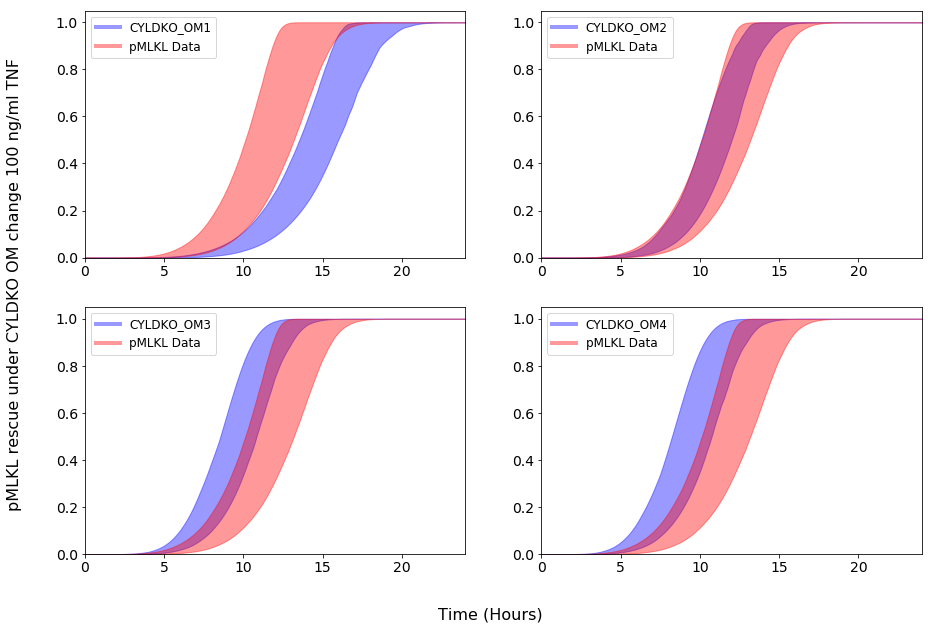

In [170]:
df1 = pd.concat([c3df100cyldsim121/5544, c3df100cyldsim6/5544],
               keys=['OM1', 'WT'],
               names=['group', 'simulation', 'time'])
df2 = pd.concat([c3df100cyldsim122/5544, c3df100cyldsim6/5544],
               keys=['OM2', 'WT'],
               names=['group', 'simulation', 'time'])
df3 = pd.concat([c3df100cyldsim123/5544, c3df100cyldsim6/5544],
               keys=['OM3', 'WT'],
               names=['group', 'simulation', 'time'])
df4 = pd.concat([c3df100cyldsim124/5544, c3df100cyldsim6/5544],
               keys=['OM4', 'WT'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot1 = {
    ('MLKLa_obs', 'OM1'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
obs_to_plot2 = {
    ('MLKLa_obs', 'OM2'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
obs_to_plot3 = {
    ('MLKLa_obs', 'OM3'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
obs_to_plot4 = {
    ('MLKLa_obs', 'OM4'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
lower_quantile = 0.02  # 10%
upper_quantile = .97  # 90%
median = 0.5
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
for obs_pair, colour in obs_to_plot1.items():
    obs, group = obs_pair
    quantile_data = df1[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax1.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.set_xlim(xmin = 0, xmax = 24)
    ax1.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4, alpha= 0.4),
                   Line2D([0], [0], color='red', lw=4, alpha = 0.4)]
    ax1.legend(custom_lines, ['CYLDKO_OM1', 'pMLKL Data'], prop={'size': 12}, loc = 'upper left')

for obs_pair, colour in obs_to_plot2.items():
    obs, group = obs_pair
    quantile_data = df2[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax2.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.set_xlim(xmin = 0, xmax = 24)
    ax2.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4, alpha= 0.4),
                   Line2D([0], [0], color='red', lw=4, alpha= 0.4)]
    ax2.legend(custom_lines, ['CYLDKO_OM2', 'pMLKL Data'], prop={'size': 12}, loc = 'upper left')
    
for obs_pair, colour in obs_to_plot3.items():
    obs, group = obs_pair
    quantile_data = df3[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax3.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.set_xlim(xmin = 0, xmax = 24)
    ax3.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4, alpha= 0.4),
                   Line2D([0], [0], color='red', lw=4, alpha= 0.4)]
    ax3.legend(custom_lines, ['CYLDKO_OM3', 'pMLKL Data'], prop={'size': 12}, loc = 'upper left')

for obs_pair, colour in obs_to_plot4.items():
    obs, group = obs_pair
    quantile_data = df4[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax4.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax4.set_xlim(xmin = 0, xmax = 24)
    ax4.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax4.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4, alpha= 0.4),
                   Line2D([0], [0], color='red', lw=4, alpha= 0.4)]
    ax4.legend(custom_lines, ['CYLDKO_OM4', 'pMLKL Data'], prop={'size': 12}, loc = 'upper left')
fig.text(0.5, 0.04, 'Time (Hours)', ha='center', va='center',fontsize = 16)
fig.text(0.06, 0.5, 'pMLKL rescue under CYLDKO OM change 100 ng/ml TNF',
         ha='center', va='center', rotation='vertical', fontsize = 16)
# matplotlib.rc('xtick', labelsize=14) 
# matplotlib.rc('ytick', labelsize=14) 
# plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
# plt.xlabel('Time (hours)', fontsize = 14) # X label
# plt.xlim(xmax =24)
# plt.ylim(ymin = 1e-3, ymax = 1.009)
# plt.tight_layout()
# custom_lines = [Line2D([0], [0], color='blue', lw=4)]
# plt.legend(custom_lines, ['pMLKL'], prop={'size': 10}, loc = 'best')
# plt.savefig("necro_10k_5720_mode4_pmlklrescue_cyldko_omchange_tnf100.pdf")
plt.show()

In [156]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_1400_16001, num_processors = 20)
c3df100cyldsim141 = cyldclus3sim6.dataframe

2021-08-04 11:55:45.416 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-04 11:55:45.429 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-04 11:55:45.501 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-04 11:55:45.694 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-04 11:55:49.853 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-04 11:55:49.855 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-04 11:55:50.035 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [157]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_1400_16002, num_processors = 20)
c3df100cyldsim142 = cyldclus3sim6.dataframe

2021-08-04 11:55:50.147 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-04 11:55:50.153 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-04 11:55:50.186 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-04 11:55:50.224 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-04 11:55:54.586 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-04 11:55:54.587 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-04 11:55:54.708 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [158]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_1400_16003, num_processors = 20)
c3df100cyldsim143 = cyldclus3sim6.dataframe

2021-08-04 11:55:54.817 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-04 11:55:54.822 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-04 11:55:54.855 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-04 11:55:54.893 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-04 11:55:59.382 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-04 11:55:59.383 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-04 11:55:59.530 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [159]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_1400_16004, num_processors = 20)
c3df100cyldsim144 = cyldclus3sim6.dataframe

2021-08-04 11:55:59.647 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-04 11:55:59.652 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-04 11:55:59.686 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-04 11:55:59.727 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-04 11:56:04.210 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-04 11:56:04.212 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-04 11:56:04.331 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [195]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_100d1, num_processors = 20)
c3df100cyldsimd1 = cyldclus3sim6.dataframe

2021-08-04 14:09:59.520 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-04 14:09:59.532 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-04 14:09:59.603 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-04 14:09:59.666 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-04 14:10:01.225 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-04 14:10:01.227 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-04 14:10:01.288 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [196]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_100d2, num_processors = 20)
c3df100cyldsimd2 = cyldclus3sim6.dataframe

2021-08-04 14:10:01.877 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-04 14:10:01.890 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-04 14:10:01.968 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-04 14:10:02.035 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-04 14:10:03.804 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-04 14:10:03.806 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-04 14:10:03.864 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [197]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_100d3, num_processors = 20)
c3df100cyldsimd3 = cyldclus3sim6.dataframe

2021-08-04 14:10:03.877 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-04 14:10:03.884 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-04 14:10:03.926 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-04 14:10:03.971 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-04 14:10:05.771 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-04 14:10:05.772 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-04 14:10:05.843 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [198]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_100d4, num_processors = 20)
c3df100cyldsimd4 = cyldclus3sim6.dataframe

2021-08-04 14:10:05.857 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-04 14:10:05.864 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-04 14:10:05.913 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-04 14:10:05.964 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-04 14:10:07.534 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-04 14:10:07.537 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-04 14:10:07.597 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


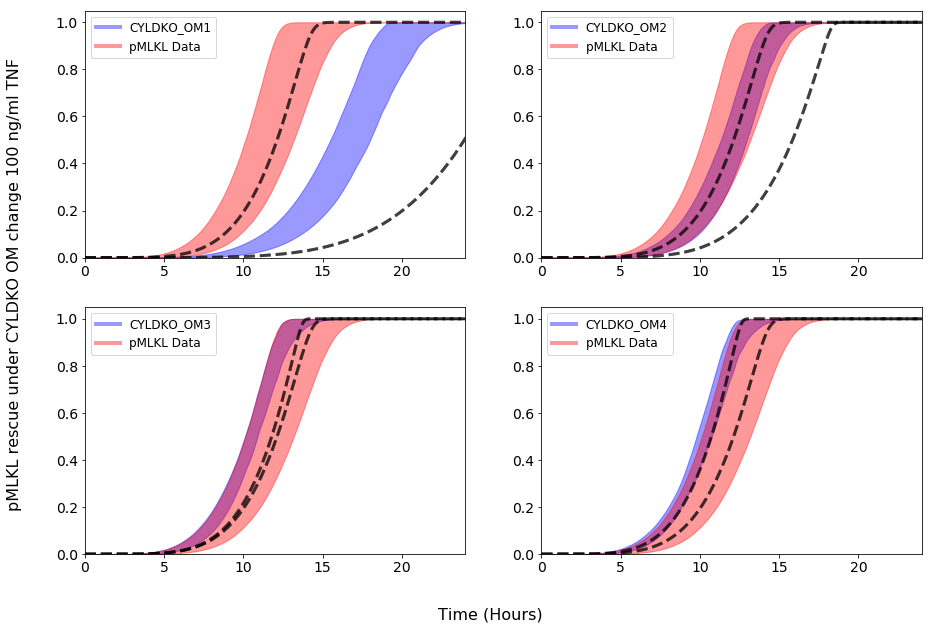

In [202]:
df1 = pd.concat([c3df100cyldsim141/5544, c3df100cyldsim6/5544],
               keys=['OM1', 'WT'],
               names=['group', 'simulation', 'time'])
df2 = pd.concat([c3df100cyldsim142/5544, c3df100cyldsim6/5544],
               keys=['OM2', 'WT'],
               names=['group', 'simulation', 'time'])
df3 = pd.concat([c3df100cyldsim143/5544, c3df100cyldsim6/5544],
               keys=['OM3', 'WT'],
               names=['group', 'simulation', 'time'])
df4 = pd.concat([c3df100cyldsim144/5544, c3df100cyldsim6/5544],
               keys=['OM4', 'WT'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot1 = {
    ('MLKLa_obs', 'OM1'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
obs_to_plot2 = {
    ('MLKLa_obs', 'OM2'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
obs_to_plot3 = {
    ('MLKLa_obs', 'OM3'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
obs_to_plot4 = {
    ('MLKLa_obs', 'OM4'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
lower_quantile = 0.02  # 10%
upper_quantile = .97  # 90%
median = 0.5
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
for obs_pair, colour in obs_to_plot1.items():
    obs, group = obs_pair
    quantile_data = df1[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax1.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    ax1.plot(tspan/60, c3df100cyldsim6wt['MLKLa_obs'].iloc[:]/5544, lw=3, color ='black', linestyle = '--', zorder = 2, alpha = 0.5)
    ax1.plot(tspan/60, c3df100cyldsimd1['MLKLa_obs'].iloc[:]/5544, lw=3, color ='black', linestyle = '--', zorder = 2, alpha = 0.5)
    #     ax1.plot(tspan/60, c3df100cyldsim6ko['MLKLa_obs'].iloc[:]/5544, lw=3, color ='black', linestyle = '-', zorder = 2, alpha = 0.5)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.set_xlim(xmin = 0, xmax = 24)
    ax1.set_ylim(ymin = 0)
    ax1.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4, alpha= 0.4),
                   Line2D([0], [0], color='red', lw=4, alpha = 0.4)]
    ax1.legend(custom_lines, ['CYLDKO_OM1', 'pMLKL Data'], prop={'size': 12}, loc = 'upper left')

for obs_pair, colour in obs_to_plot2.items():
    obs, group = obs_pair
    quantile_data = df2[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax2.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    ax2.plot(tspan/60, c3df100cyldsim6wt['MLKLa_obs'].iloc[:]/5544, lw=3, color ='black', linestyle = '--', zorder = 2, alpha = 0.5)
    ax2.plot(tspan/60, c3df100cyldsimd2['MLKLa_obs'].iloc[:]/5544, lw=3, color ='black', linestyle = '--', zorder = 2, alpha = 0.5)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.set_xlim(xmin = 0, xmax = 24)
    ax2.set_ylim(ymin = 0)
    ax2.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4, alpha= 0.4),
                   Line2D([0], [0], color='red', lw=4, alpha= 0.4)]
    ax2.legend(custom_lines, ['CYLDKO_OM2', 'pMLKL Data'], prop={'size': 12}, loc = 'upper left')
    
for obs_pair, colour in obs_to_plot3.items():
    obs, group = obs_pair
    quantile_data = df3[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax3.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    ax3.plot(tspan/60, c3df100cyldsim6wt['MLKLa_obs'].iloc[:]/5544, lw=3, color ='black', linestyle = '--', zorder = 2, alpha = 0.5)
    ax3.plot(tspan/60, c3df100cyldsimd3['MLKLa_obs'].iloc[:]/5544, lw=3, color ='black', linestyle = '--', zorder = 2, alpha = 0.5)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.set_xlim(xmin = 0, xmax = 24)
    ax3.set_ylim(ymin = 0)
    ax3.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4, alpha= 0.4),
                   Line2D([0], [0], color='red', lw=4, alpha= 0.4)]
    ax3.legend(custom_lines, ['CYLDKO_OM3', 'pMLKL Data'], prop={'size': 12}, loc = 'upper left')

for obs_pair, colour in obs_to_plot4.items():
    obs, group = obs_pair
    quantile_data = df4[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax4.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    ax4.plot(tspan/60, c3df100cyldsim6wt['MLKLa_obs'].iloc[:]/5544, lw=3, color ='black', linestyle = '--', zorder = 2, alpha = 0.5)
    ax4.plot(tspan/60, c3df100cyldsimd4['MLKLa_obs'].iloc[:]/5544, lw=3, color ='black', linestyle = '--', zorder = 2, alpha = 0.5)         
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax4.set_xlim(xmin = 0, xmax = 24)
    ax4.set_ylim(ymin = 0)
    ax4.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4, alpha= 0.4),
                   Line2D([0], [0], color='red', lw=4, alpha= 0.4)]
    ax4.legend(custom_lines, ['CYLDKO_OM4', 'pMLKL Data'], prop={'size': 12}, loc = 'upper left')
fig.text(0.5, 0.04, 'Time (Hours)', ha='center', va='center',fontsize = 16)
fig.text(0.06, 0.5, 'pMLKL rescue under CYLDKO OM change 100 ng/ml TNF',
         ha='center', va='center', rotation='vertical', fontsize = 16)
# matplotlib.rc('xtick', labelsize=14) 
# matplotlib.rc('ytick', labelsize=14) 
# plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
# plt.xlabel('Time (hours)', fontsize = 14) # X label
# plt.xlim(xmax =24)
# plt.ylim(ymin = 1e-3, ymax = 1.009)
# plt.tight_layout()
# custom_lines = [Line2D([0], [0], color='blue', lw=4)]
# plt.legend(custom_lines, ['pMLKL'], prop={'size': 10}, loc = 'best')
# plt.savefig("necro_10k_5720_mode4_pmlklrescue_cyldko_omchange_tnf100.pdf")
plt.show()

In [223]:
clus3_100d[30]

1.4719729773262927e-05

In [145]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_1600_18001, num_processors = 20)
c3df100cyldsim161 = cyldclus3sim6.dataframe

2021-08-03 21:14:12.061 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-03 21:14:12.073 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-03 21:14:12.142 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-03 21:14:12.216 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-03 21:14:21.301 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-03 21:14:21.302 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-03 21:14:21.539 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [146]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_1600_18002, num_processors = 20)
c3df100cyldsim162 = cyldclus3sim6.dataframe

2021-08-03 21:14:21.807 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-03 21:14:21.812 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-03 21:14:21.846 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-03 21:14:21.895 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-03 21:14:31.767 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-03 21:14:31.768 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-03 21:14:32.079 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [147]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_1600_18003, num_processors = 20)
c3df100cyldsim163 = cyldclus3sim6.dataframe

2021-08-03 21:14:32.322 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-03 21:14:32.326 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-03 21:14:32.359 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-03 21:14:32.408 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-03 21:14:42.490 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-03 21:14:42.491 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-03 21:14:42.736 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [148]:
solvercyld3sim6 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim6 = solvercyld3sim6.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_1600_18004, num_processors = 20)
c3df100cyldsim164 = cyldclus3sim6.dataframe

2021-08-03 21:14:43.001 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-08-03 21:14:43.006 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-08-03 21:14:43.039 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-08-03 21:14:43.087 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-08-03 21:14:53.360 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-08-03 21:14:53.361 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-08-03 21:14:53.670 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


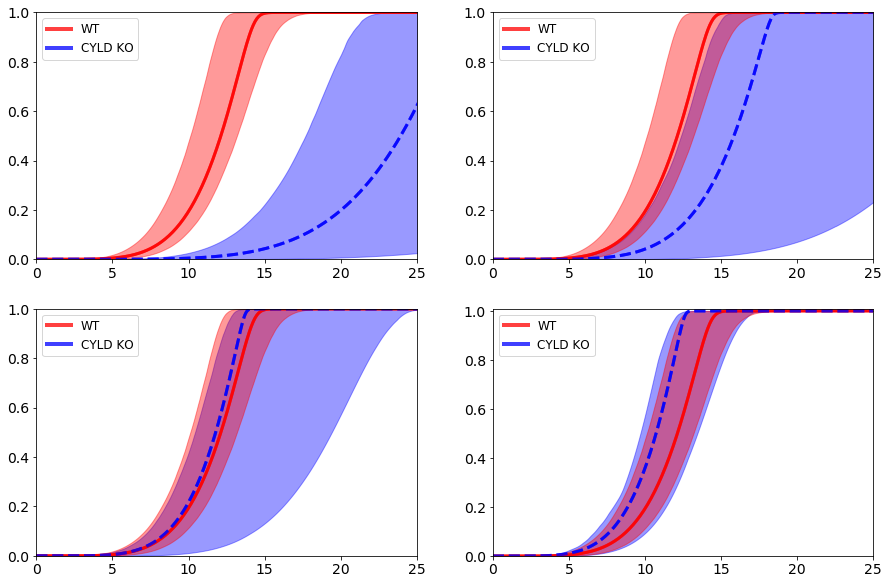

In [266]:
df1 = pd.concat([c3df100cyldsim161/5544, c3df100cyldsim6/5544],
               keys=['OM1', 'WT'],
               names=['group', 'simulation', 'time'])
df2 = pd.concat([c3df100cyldsim162/5544, c3df100cyldsim6/5544],
               keys=['OM2', 'WT'],
               names=['group', 'simulation', 'time'])
df3 = pd.concat([c3df100cyldsim163/5544, c3df100cyldsim6/5544],
               keys=['OM3', 'WT'],
               names=['group', 'simulation', 'time'])
df4 = pd.concat([c3df100cyldsim164/5544, c3df100cyldsim6/5544],
               keys=['OM4', 'WT'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot1 = {
    ('MLKLa_obs', 'OM1'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
obs_to_plot2 = {
    ('MLKLa_obs', 'OM2'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
obs_to_plot3 = {
    ('MLKLa_obs', 'OM3'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
obs_to_plot4 = {
    ('MLKLa_obs', 'OM4'): 'blue',
    ('MLKLa_obs', 'WT'): 'red'
}
lower_quantile = 0.02  # 10%
upper_quantile = .97  # 90%
median = 0.5
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
for obs_pair, colour in obs_to_plot1.items():
    obs, group = obs_pair
    quantile_data = df1[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax1.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    ax1.plot(tspan/60, c3df100cyldsim6wt['MLKLa_obs'].iloc[:]/5544, lw=3, color ='red',zorder = 2, alpha = 0.75)
    ax1.plot(tspan/60, c3df100cyldsimd1['MLKLa_obs'].iloc[:]/5544, lw=3, color ='blue', linestyle = '--', zorder = 2, alpha = 0.75)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.set_xlim(xmin = 0, xmax = 25)
    ax1.set_ylim(ymin = 0, ymax = 1.0009)
    ax1.grid(False)   
    custom_lines = [Line2D([0], [0], color='red', lw=4, alpha = 0.75),
                   Line2D([0], [0], color='blue', lw=4, alpha = 0.75)]
    ax1.legend(custom_lines, ['WT', 'CYLD KO'], prop={'size': 12}, loc = 'upper left')

for obs_pair, colour in obs_to_plot2.items():
    obs, group = obs_pair
    quantile_data = df2[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax2.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    ax2.plot(tspan/60, c3df100cyldsim6wt['MLKLa_obs'].iloc[:]/5544, lw=3, color ='red',zorder = 2, alpha = 0.75)
    ax2.plot(tspan/60, c3df100cyldsimd2['MLKLa_obs'].iloc[:]/5544, lw=3, color ='blue', linestyle = '--', zorder = 2, alpha = 0.75)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.set_xlim(xmin = 0, xmax = 25)
    ax2.set_ylim(ymin = 0, ymax = 1.0009)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.grid(False)   
    custom_lines = [Line2D([0], [0], color='red', lw=4, alpha = 0.75),
                   Line2D([0], [0], color='blue', lw=4, alpha = 0.75)]
    ax2.legend(custom_lines, ['WT', 'CYLD KO'], prop={'size': 12}, loc = 'upper left')
    
for obs_pair, colour in obs_to_plot3.items():
    obs, group = obs_pair
    quantile_data = df3[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax3.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    ax3.plot(tspan/60, c3df100cyldsim6wt['MLKLa_obs'].iloc[:]/5544, lw=3, color ='red', zorder = 2, alpha = 0.75)
    ax3.plot(tspan/60, c3df100cyldsimd3['MLKLa_obs'].iloc[:]/5544, lw=3, color ='blue', linestyle = '--', zorder = 2, alpha = 0.75)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.set_xlim(xmin = 0, xmax = 25)
    ax3.set_ylim(ymin = 0, ymax = 1.0009)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.grid(False)   
    custom_lines = [Line2D([0], [0], color='red', lw=4, alpha = 0.75),
                   Line2D([0], [0], color='blue', lw=4, alpha = 0.75)]
    ax3.legend(custom_lines, ['WT', 'CYLD KO'], prop={'size': 12}, loc = 'upper left')

for obs_pair, colour in obs_to_plot4.items():
    obs, group = obs_pair
    quantile_data = df4[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    ax4.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour, alpha = 0.4)
    ax4.plot(tspan/60, c3df100cyldsim6wt['MLKLa_obs'].iloc[:]/5544, lw=3, color ='red',zorder = 2, alpha = 0.75)
    ax4.plot(tspan/60, c3df100cyldsimd4['MLKLa_obs'].iloc[:]/5544, lw=3, color ='blue', linestyle = '--', zorder = 2, alpha = 0.75)
    x = [0,5,10,15,20, 25,30]
    plt.xticks(np.arange(min(x), max(x), 5.0), fontsize = 14)
    plt.yticks(fontsize=14)
    ax4.set_xlim(xmin = 0, xmax = 25)
    ax4.set_ylim(ymin = 0, ymax = 1.0009)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax4.grid(False)   
    custom_lines = [Line2D([0], [0], color='red', lw=4, alpha = 0.75),
                   Line2D([0], [0], color='blue', lw=4, alpha = 0.75)]
    ax4.legend(custom_lines, ['WT', 'CYLD KO'], prop={'size': 12}, loc = 'upper left')
# fig.text(0.5, 0.07, 'Time (Hours)', ha='center', va='center',fontsize = 16)
# fig.text(0.07, 0.5, 'pMLKL rescue under CYLDKO OM change 100 ng/ml TNF',
#          ha='center', va='center', rotation='vertical', fontsize = 16)
# matplotlib.rc('xtick', labelsize=14) 
# matplotlib.rc('ytick', labelsize=14) 
# plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
# plt.xlabel('Time (hours)', fontsize = 14) # X label
# plt.xlim(xmax =24)
plt.ylim(ymin = 1e-3, ymax = 1.009)
# plt.tight_layout()
# custom_lines = [Line2D([0], [0], color='blue', lw=4)]
# plt.legend(custom_lines, ['pMLKL'], prop={'size': 10}, loc = 'best')
# plt.savefig("necro_10k_5720_mode4_pmlklrescue_cyldko_omchange1600_1800_tnf100_noaxis.pdf")
plt.show()

In [ ]:
df1 = pd.concat([wtclus3.dataframe/5544],
               keys=['wt'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot1 = {
    ('MLKLa_obs', 'wt'): 'blue'
}

lower_quantile = 0.02  # 10%
upper_quantile = .97  # 90%
median = 0.5
plt.figure()
# plt.style.use('classic')
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
# plt.subplot(211)
# legend_keys = []
for obs_pair, colour in obs_to_plot1.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df1[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    plt.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour)
# ax.edgecolor: .15
# ax.linewidth: 1.25
# plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
plt.ylim(ymin = 1e-3, ymax = 1.009)
plt.tight_layout()
# custom_lines = [Line2D([0], [0], color='blue', lw=4)]
# plt.legend(custom_lines, ['pMLKL'], prop={'size': 10}, loc = 'best')
plt.savefig("necro_10k_5720_wdatac3_tnf100.pdf")
plt.show()

In [ ]:
solvercyld3sim8 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim8 = solvercyld3sim8.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_100[sim_idx_800_1000], num_processors = 20)
c3df100cyldsim8 = cyldclus3sim8.dataframe

In [ ]:
solvercyld3sim10 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim10 = solvercyld3sim10.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_100[sim_idx_1000_1200], num_processors = 20)
c3df100cyldsim10 = cyldclus3sim10.dataframe

In [ ]:
solvercyld3sim12 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim12 = solvercyld3sim12.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_100[sim_idx_1200_1400], num_processors = 20)
c3df100cyldsim12 = cyldclus3sim12.dataframe

In [ ]:
solvercyld3sim14 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim14 = solvercyld3sim14.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_100[sim_idx_1400_1600], num_processors = 20)
c3df100cyldsim14 = cyldclus3sim14.dataframe

In [ ]:
solvercyld3sim16 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3sim16 = solvercyld3sim16.run(initials = {m.TNF(brec=None): 2326, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_100[sim_idx_1600_1800], num_processors = 20)
c3df100cyldsim16 = cyldclus3sim16.dataframe

In [ ]:
c0df100wt['MLKLa_obs']/5544

In [ ]:
import matplotlib.pyplot as plt
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])

x1 = np.array([0, 30, 90, 270,480, 720])
x2 = np.array([960])
y2 = np.array([0.109561346])
y1 = np.array([0,0.085233734,0.006063293,0.009426917,0.011334223, 0.02])

x01 = np.array([0, 30, 90, 270,480, 720, 960])
y01 = np.array([0, 0.006714721,0.007776423,0.00919829,0.001772636, 0.005, 0.013633013])

# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df1 = pd.concat([wtclus3.dataframe/5544],
               keys=['wt'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot1 = {
    ('MLKLa_obs', 'wt'): 'blue'
}

lower_quantile = 0.02  # 10%
upper_quantile = .97  # 90%
median = 0.5
plt.figure()
# plt.style.use('classic')
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
# plt.subplot(211)
# legend_keys = []
for obs_pair, colour in obs_to_plot1.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df1[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    plt.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour)
# ax.edgecolor: .15
# ax.linewidth: 1.25
# plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
plt.ylim(ymin = 1e-3, ymax = 1.009)
plt.tight_layout()
# custom_lines = [Line2D([0], [0], color='blue', lw=4)]
# plt.legend(custom_lines, ['pMLKL'], prop={'size': 10}, loc = 'best')
plt.savefig("necro_10k_5720_wdatac3_tnf100.pdf")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])

x1 = np.array([0, 30, 90, 270,480, 720])
x2 = np.array([960])
y2 = np.array([0.109561346])
y1 = np.array([0,0.085233734,0.006063293,0.009426917,0.011334223, 0.02])

x01 = np.array([0, 30, 90, 270,480, 720, 960])
y01 = np.array([0, 0.006714721,0.007776423,0.00919829,0.001772636, 0.005, 0.013633013])

# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df1 = pd.concat([wtclus0.dataframe/5544],
               keys=['wt100'],
               names=['group', 'simulation', 'time'])
# df2 = pd.concat([wtclus1.dataframe],
#                keys=['wt10'],
#                names=['group', 'simulation', 'time'])
# df3 = pd.concat([wtclus2.dataframe],
#                keys=['wt1'],
#                names=['group', 'simulation', 'time'])
# df4 = pd.concat([wtclus3.dataframe],
#                keys=['wt01'],
#                names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot1 = {
    ('MLKLa_obs', 'wt100'): 'blue'
}
# obs_to_plot2 = {
#     ('MLKLa_obs', 'wt10'): 'orange'
# }
# obs_to_plot3 = {
#     ('MLKLa_obs', 'wt1'): 'green'
# }
# obs_to_plot4 = {
#     ('MLKLa_obs', 'wt01'): 'red'
# }

lower_quantile = 0.02  # 10%
upper_quantile = .97  # 90%
median = 0.5
plt.figure()
# plt.style.use('classic')
# matplotlib.rc('xtick', labelsize=14) 
# matplotlib.rc('ytick', labelsize=14) 
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
# plt.subplot(211)
# legend_keys = []
for obs_pair, colour in obs_to_plot1.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df1[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    plt.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour)
# ax.edgecolor: .15
# ax.linewidth: 1.25
# plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
plt.ylim(ymin = 1e-3, ymax = 1.001)
    #100 TNF
plt.grid(False)
locs, labels = xticks()            # Get locations and labels
# xticks(xticks, [labels])
# plt.errorbar(x1001/60, y1001*5544,
#              yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
#              (400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.tight_layout()

# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                 Line2D([0], [0], color='orange', lw=4),
#                 Line2D([0], [0], color='green', lw=4),
#                 Line2D([0], [0], color='red', lw=4),
#                 Line2D([0], [0], color='black', lw=4)]
# plt.legend(custom_lines, ['100','10','1','0.1','Data'], prop={'size': 10}, loc = 'best')
fig.savefig("necro_10k_5720_wdatac0_tnf100.pdf")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])

x1 = np.array([0, 30, 90, 270,480, 720])
x2 = np.array([960])
y2 = np.array([0.109561346])
y1 = np.array([0,0.085233734,0.006063293,0.009426917,0.011334223, 0.02])

x01 = np.array([0, 30, 90, 270,480, 720, 960])
y01 = np.array([0, 0.006714721,0.007776423,0.00919829,0.001772636, 0.005, 0.013633013])

# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df1 = pd.concat([wtclus0.dataframe],
               keys=['wt100'],
               names=['group', 'simulation', 'time'])
# df2 = pd.concat([wtclus1.dataframe],
#                keys=['wt10'],
#                names=['group', 'simulation', 'time'])
# df3 = pd.concat([wtclus2.dataframe],
#                keys=['wt1'],
#                names=['group', 'simulation', 'time'])
# df4 = pd.concat([wtclus3.dataframe],
#                keys=['wt01'],
#                names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot1 = {
    ('MLKLa_obs', 'wt100'): 'blue'
}
# obs_to_plot2 = {
#     ('MLKLa_obs', 'wt10'): 'orange'
# }
# obs_to_plot3 = {
#     ('MLKLa_obs', 'wt1'): 'green'
# }
# obs_to_plot4 = {
#     ('MLKLa_obs', 'wt01'): 'red'
# }

lower_quantile = 0.02  # 10%
upper_quantile = .97  # 90%
median = 0.5
plt.figure()
# plt.style.use('classic')
# matplotlib.rc('xtick', labelsize=14) 
# matplotlib.rc('ytick', labelsize=14) 
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
# plt.subplot(211)
# legend_keys = []
for obs_pair, colour in obs_to_plot1.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df1[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    plt.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour)
# ax.edgecolor: .15
# ax.linewidth: 1.25
# plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
# plt.xlim(xmax =24)
plt.ylim(ymin = 1e-3)
    #100 TNF
plt.grid(False)
locs, labels = xticks()            # Get locations and labels
# xticks(xticks, [labels])
plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.tight_layout()

# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                 Line2D([0], [0], color='orange', lw=4),
#                 Line2D([0], [0], color='green', lw=4),
#                 Line2D([0], [0], color='red', lw=4),
#                 Line2D([0], [0], color='black', lw=4)]
# plt.legend(custom_lines, ['100','10','1','0.1','Data'], prop={'size': 10}, loc = 'best')
fig.savefig("necro_10k_5720_wdatac0_tnf100.pdf")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])

x1 = np.array([0, 30, 90, 270,480, 720])
x2 = np.array([960])
y2 = np.array([0.109561346])
y1 = np.array([0,0.085233734,0.006063293,0.009426917,0.011334223, 0.02])

x01 = np.array([0, 30, 90, 270,480, 720, 960])
y01 = np.array([0, 0.006714721,0.007776423,0.00919829,0.001772636, 0.005, 0.013633013])

# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df1 = pd.concat([wtclus0.dataframe],
               keys=['wt100'],
               names=['group', 'simulation', 'time'])
df2 = pd.concat([wtclus1.dataframe],
               keys=['wt10'],
               names=['group', 'simulation', 'time'])
df3 = pd.concat([wtclus2.dataframe],
               keys=['wt1'],
               names=['group', 'simulation', 'time'])
df4 = pd.concat([wtclus3.dataframe],
               keys=['wt01'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot1 = {
    ('MLKLa_obs', 'wt100'): 'blue'
}
obs_to_plot2 = {
    ('MLKLa_obs', 'wt10'): 'orange'
}
obs_to_plot3 = {
    ('MLKLa_obs', 'wt1'): 'green'
}
obs_to_plot4 = {
    ('MLKLa_obs', 'wt01'): 'red'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
plt.subplot(211)
# legend_keys = []
for obs_pair, colour in obs_to_plot1.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df1[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax1.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax1.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)
    plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
    plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
    plt.xlabel('Time (hours)', fontsize = 14) # X label
    # plt.xlim(xmax =24)
    plt.ylim(ymin = 1e-3)
    #100 TNF
    plt.errorbar(x1001/60, y1001*5544,
                 yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
                 (400,400,400,400)],
                       fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
    plt.errorbar(x1002/60, y1002*5544,
                 yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.subplot(212)
legend_keys = []
for obs_pair, colour in obs_to_plot2.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df2[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax2.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax2.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)
    plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
    plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
    plt.xlabel('Time (hours)', fontsize = 14) # X label
    # plt.xlim(xmax =24)
    plt.ylim(ymin = 1e-3)
    #10TNF
    plt.errorbar(x101/60, y101*5544,
                 yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                        0.050022163974868*5544),
                 (400,400,400,400,400)],
                       fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
    plt.errorbar(x102/60, y102*5544,
                 yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.subplot(221)
legend_keys = []
for obs_pair, colour in obs_to_plot3.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df3[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax3.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax3.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)
    plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
    plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
    plt.xlabel('Time (hours)', fontsize = 14) # X label
    # plt.xlim(xmax =24)
    plt.ylim(ymin = 1e-3)
    #1TNF
    plt.errorbar(x1/60, y1*5544,
                 yerr=[(0,0.085233734*5544,0.006063293*5544,0.009426917*5544,0.011334223*5544,
                        0.02*5544),(400,400,400,400,400,400)],
                       fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)

    plt.errorbar(x2/60, y2*5544,
                 yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.subplot(222)
legend_keys = []
for obs_pair, colour in obs_to_plot4.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df4[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax4.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax4.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)
    plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
    plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
    plt.xlabel('Time (hours)', fontsize = 14) # X label
    # plt.xlim(xmax =24)
    plt.ylim(ymin = 1e-3)
    #01 TNF
    plt.errorbar(x01/60, y01*5544,
                  yerr=[(0, 0.006714721*5544,0.007776423*5544,0.00919829*5544,0.001772636*5544,
                        0.005*5544, 0.013633013*5544), (400,400,400,400,400,400,400)],
                       fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                 Line2D([0], [0], color='orange', lw=4),
#                 Line2D([0], [0], color='green', lw=4),
#                 Line2D([0], [0], color='red', lw=4),
#                 Line2D([0], [0], color='black', lw=4)]
# plt.legend(custom_lines, ['100','10','1','0.1','Data'], prop={'size': 10}, loc = 'best')
# fig.savefig("updatedkos/necro_10k_5720_wdata_alltnf.pdf")
plt.show()

In [ ]:
m = model100.components

In [ ]:
tspan = np.linspace(0, 1800, 500)

In [ ]:
solvera200 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
a20clus0 = solvera200.run(initials = {m.TNF(brec=None): 233, m.A20(brip = None):0},
                         param_values=clus0_100, num_processors = 20)
# a20clus0.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c0parsmod_30hra20ko.h5',include_obs_exprs = True)
c0df100a20 = a20clus0.dataframe

In [ ]:
print(len(clus0_100))

In [ ]:
sim_idx_to_keep = [idx for idx in range(len(clus0_100)) if c0df100a20['MLKLa_obs'][idx].iloc[-200] < 2772]
print(sim_idx_to_keep)

In [ ]:
solvera201 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
a20clus1 = solvera201.run(initials = {m.TNF(brec=None): 233, m.A20(brip = None):0},
                         param_values=clus1_100, num_processors = 20)
# a20clus1.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c1parsmod_30hra20ko.h5',include_obs_exprs = True)
c1df100a201 = a20clus1.dataframe

In [ ]:
solvera202 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
a20clus2 = solvera202.run(initials = {m.TNF(brec=None): 233, m.A20(brip = None):0},
                         param_values=clus2_100, num_processors = 20)
# a20clus2.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c2parsmod_30hras20ko.h5',include_obs_exprs = True)
c2df100a20 = a20clus2.dataframe

In [ ]:
solvera203 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
a20clus3 = solvera203.run(initials = {m.TNF(brec=None): 233, m.A20(brip = None):0},
                         param_values=clus3_100, num_processors = 20)
# a20clus3.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c3parsmod_30hra20ko.h5',include_obs_exprs = True)
c3df100a20 = a20clus3.dataframe

In [ ]:
solvercyld0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus0 = solvercyld0.run(initials = {m.TNF(brec=None): 233,  m.CYLD(brip=None, btraf = None):0},
                         param_values=clus0_100, num_processors = 20)
# cyldclus0.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c0parsmod_30hcyldko.h5',include_obs_exprs = True)
c0df100cyld = cyldclus0.dataframe

In [ ]:
solvercyld1 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus1 = solvercyld1.run(initials = {m.TNF(brec=None): 233,  m.CYLD(brip=None, btraf = None):0},
                         param_values=clus1_100, num_processors = 20)
# cyldclus1.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c1parsmod_30hrcyldko.h5',include_obs_exprs = True)
c1f100cyld = cyldclus1.dataframe

In [ ]:
solvercyld2 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus2 = solvercyld2.run(initials = {m.TNF(brec=None): 233,  m.CYLD(brip=None, btraf = None):0},
                         param_values=clus2_100, num_processors = 20)
# cyldclus2.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c2parsmod_30hcyldko.h5',include_obs_exprs = True)
c2df100cyld = cyldclus2.dataframe

In [ ]:
solvercyld3 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus3 = solvercyld3.run(initials = {m.TNF(brec=None): 233, m.CYLD(brip=None, btraf = None):0},
                         param_values=clus3_100, num_processors = 20)
# cyldclus3.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c3parsmod_30hrcyldko.h5',include_obs_exprs = True)
c3df100cyld = cyldclus3.dataframe

In [ ]:
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, .98])

In [ ]:
import matplotlib
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
# tspan = np.linspace(0, 1440, 300)
for n in range(len(clus0_100)):
#     ax1.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label ='50% pMLKL')
    ax1.plot(tspan/60, c0df100a20.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    ax1.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    ax1.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
# for obs_pair, colour in obs_to_plot2.items():
#     obs, group = obs_pair
#     # Calculate 10%, 50%, and 90% quantiles for observable
#     quantile_data = df2[obs].loc[group].groupby(['time']).quantile(
#         q=[lower_quantile, median, upper_quantile]).unstack()
#     time_hrs = quantile_data.index / 60
#     # Plot the median line (50% quantile) for the observable
#     ax2.plot(time_hrs, quantile_data.loc[:, median], color=colour)
#     # Plot the 10% and 90% quantiles as an envelope
#     ax2.fill_between(time_hrs,
#                     quantile_data.loc[:, lower_quantile],
#                     quantile_data.loc[:, upper_quantile],
#                     color=colour,
#                     alpha=.1)
#     plt.legend(['clus0'], loc = 'best', fontsize = 14)
#     plt.ylim(ymax = 5544, ymin =0)
#     plt.xlim(xmax = 1440, xmin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.set_xlim(xmin = 0, xmax = 24)
    ax1.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax1.legend(custom_lines, ['Clus0', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
# tspan2 = np.linspace(0, 2160, 300)    
for n in range(len(clus1_100)):
#     ax2.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label= '50% pMLKL')
    ax2.plot(tspan/60, c1df100a201.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    ax2.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    ax2.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.set_xlim(xmin = 0, xmax = 24)
    ax2.set_ylim(ymin = 0)
    ax2.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax2.legend(custom_lines, ['Clus1', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
for n in range(len(clus2_100)):
#     ax3.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label ='50% pMLKL')
    ax3.plot(tspan/60, c2df100a20.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='blue', zorder = 1, alpha = 0.3)  
    ax3.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    ax3.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.set_xlim(xmin = 0, xmax = 24)
    ax3.set_ylim(ymin = 0)
    ax3.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax3.legend(custom_lines, ['Clus2', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
for n in range(len(clus3_100)):
    plt.plot(tspan/60, c3df100a20.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    ax4.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    ax4.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='red', alpha = 0.75, zorder = 2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
#     plt.xlabel("Time (in hr)", fontsize=15)
#     plt.ylabel("Amount (normalized)", fontsize=15)
    ax4.set_xlim(xmin = 0, xmax = 24)
    ax4.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax4.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax4.legend(custom_lines, ['Clus3', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
 
fig.text(0.5, 0.04, 'Time (Hours)', ha='center', va='center',fontsize = 16)
fig.text(0.06, 0.5, 'Amount of A20 pMLKL under 100 ng/ml TNF(Normalized)',
         ha='center', va='center', rotation='vertical', fontsize = 16)
# plt.savefig('pmlkl_100tnf_4clus_5720_A20KO.pdf')
plt.show()

In [ ]:
import matplotlib
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
# tspan = np.linspace(0, 1440, 300)
for n in range(len(clus0_100)):
#     ax1.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label ='50% pMLKL')
    ax1.plot(tspan/60, c0df100cyld.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    ax1.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    ax1.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    plt.legend(['clus0'], loc = 'best', fontsize = 14)
#     plt.ylim(ymax = 5544, ymin =0)
#     plt.xlim(xmax = 1440, xmin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.set_xlim(xmin = 0, xmax = 24)
    ax1.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='black', lw=4)]
    ax1.legend(custom_lines, ['Clus0', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
# tspan2 = np.linspace(0, 2160, 300)    
for n in range(len(clus1_100)):
#     ax2.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label= '50% pMLKL')
    ax2.plot(tspan/60, c1f100cyld.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    ax2.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    ax2.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.set_xlim(xmin = 0, xmax = 24)
    ax2.set_ylim(ymin = 0)
    ax2.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='black', lw=4)]
    ax2.legend(custom_lines, ['Clus1', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
for n in range(len(clus2_100)):
#     ax3.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label ='50% pMLKL')
    ax3.plot(tspan/60, c2df100cyld.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='blue', zorder = 1, alpha = 0.3)  
    ax3.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    ax3.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.set_xlim(xmin = 0, xmax = 24)
    ax3.set_ylim(ymin = 0)
    ax3.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='black', lw=4)]
    ax3.legend(custom_lines, ['Clus2', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
for n in range(len(clus3_100)):
    plt.plot(tspan/60, c3df100cyld.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    ax4.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    ax4.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
#     plt.xlabel("Time (in hr)", fontsize=15)
#     plt.ylabel("Amount (normalized)", fontsize=15)
    ax4.set_xlim(xmin = 0, xmax = 24)
    ax4.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax4.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='black', lw=4)]
    ax4.legend(custom_lines, ['Clus3', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
fig.text(0.5, 0.04, 'Time (Hours)', ha='center', va='center',fontsize = 16)
fig.text(0.06, 0.5, 'Amount of CYLD KO of pMLKL under 100 ng/ml TNF(Normalized)',
         ha='center', va='center', rotation='vertical', fontsize = 16)
# plt.savefig('pmlkl_100tnf_4clus_5720_CYLDKO.pdf')
plt.show()

In [ ]:
# threshold = 5000
threshold = 2772

In [ ]:
threshold2 = 2772

In [ ]:
df_threshtimesc1100a201   = c1df100a201.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])

In [ ]:
df_threshtimesc0100wt = c0df100wt.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
# df_threshtimesc0100a20   = c0df100a20.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
# df_threshtimesc0100cyld = c0df100cyld.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])

In [ ]:
df_threshtimesc1100wt = c1df100wt.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
# df_threshtimesc1100a20   = c1df100a20.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
# df_threshtimesc1100cyld = c1f100cyld.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])

In [ ]:
df_threshtimesc2100wt = c2df100wt.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100a20   = c2df100a20.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100cyld = c2df100cyld.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])

In [ ]:
df_threshtimesc3100wt = c3df100wt.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc3100a20   = c3df100a20.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc3100cyld = c3df100cyld.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])

In [ ]:
plt.figure()
sns.distplot(df_threshtimesc0100wt['MLKLa_obs'], bins=10) # kde=False, norm_hist=True, color='b')
sns.distplot(df_threshtimesc1100wt['MLKLa_obs'], bins=10, color = 'red')
plt.xlabel(" time [minutes]", labelpad=14)
plt.ylabel("frequency", labelpad=14)
plt.xlim(xmin = 600, xmax = 1440)
plt.show()

In [ ]:
df_threshtimesc0100wtn = c0df100wt.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc0100a20n   = c0df100a20.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc0100cyldn = c0df100cyld.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])

In [ ]:
df_threshtimesc1100wtn = c1df100wt.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc1100a20n   = c1df100a201.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc1100cyldn = c1f100cyld.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])

In [ ]:
df_threshtimesc2100wtn = c2df100wt.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100a20n   = c2df100a20.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100cyldn = c2df100cyld.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])

In [ ]:
clus2n = pd.DataFrame({'wt2n': df_threshtimesc2100wtn['MLKLa_obs'], 
                        'cyld2n': df_threshtimesc2100cyldn['MLKLa_obs'],
                        'a202n': df_threshtimesc2100a20n['MLKLa_obs']})

In [ ]:
df_threshtimesc3100wn = c3df100wt.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc3100a20n   = c3df100a20.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc3100cyldn = c3df100cyld.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])

In [ ]:
clus0n = pd.DataFrame({'wt0': df_threshtimesc0100wtn['MLKLa_obs'], 
                          'cyld0': df_threshtimesc0100cyldn['MLKLa_obs'],
                          'a200': df_threshtimesc0100a20n['MLKLa_obs']})
dfclus0n = pd.DataFrame(data = clus0n, columns = ['wt0', 'cyld0','a200'])
dfclus0n = pd.melt(dfclus0n)

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
my_pal = {"wt0": "indianred", "cyld0": "mediumseagreen", "a200":"steelblue"}
my_pal1 = {"wt0": "red", "cyld0": "green", "a200":"blue"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0, zorder=2, palette=my_pal1)
b.set_xlabel("Time (minutes)",fontsize=15)
b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=15)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0box_wswarm_5720_modnew.pdf')
plt.show()

In [ ]:
clus0 = pd.DataFrame({'wt0': df_threshtimesc0100wtn['MLKLa_obs'], 
                          'cyld0': df_threshtimesc0100cyldn['MLKLa_obs'],
                          'a200': df_threshtimesc0100a20n['MLKLa_obs']})

In [ ]:
dfclus0 = pd.DataFrame(data = clus0, columns = ['wt0', 'cyld0','a200'])
dfclus0 = pd.melt(dfclus0)

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
my_pal = {"wt0": "indianred", "cyld0": "mediumseagreen", "a200":"steelblue"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0, zorder=2, palette=my_pal)
b.set_xlabel("Time (minutes)",fontsize=15)
b.set_ylabel("Cluster 0",fontsize=15)
b.tick_params(labelsize=15)
plt.xlim(xmax = 1800, xmin = 0)
plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0box_wswarm_5720_modnewhalfmax.pdf')
plt.show()

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
my_pal = {"wt0": "indianred", "cyld0": "mediumseagreen", "a200":"steelblue"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0, zorder=2, palette=my_pal)
b.set_xlabel("Time (minutes)",fontsize=20)
b.set_ylabel("Cluster 0",fontsize=20)
b.tick_params(labelsize=20)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0box_wswarm_5720_modnew.pdf')
plt.show()

In [ ]:
clus1n = pd.DataFrame({'wt1': df_threshtimesc1100wtn['MLKLa_obs'],
                        'cyld1': df_threshtimesc1100cyldn['MLKLa_obs'],
                        'a201': df_threshtimesc1100a20n['MLKLa_obs']})

In [ ]:
dfclus1n = pd.DataFrame(data = clus1n, columns = ['wt1','cyld1','a201'])
dfclus1n = pd.melt(dfclus1n)

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
# my_pal = {"wt1": "indianred", "cyld1": "mediumseagreen", "a201":"steelblue"}

my_pal1 = {"wt1": "indianred", "cyld1": "mediumseagreen", "a201":"steelblue"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus1, notch = True, width = 0.5, palette = my_pal)
# b = sns.swarmplot(x="value", y="variable", data=dfclus1, zorder=2, palette=my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus1n, zorder=2, palette=my_pal1)

b.set_xlabel("Time (minutes)",fontsize=20)
b.set_ylabel("Cluster 1",fontsize=20)
b.tick_params(labelsize=20)
plt.xlim(xmax = 1800, xmin = 0)
plt.savefig('figs/Cluster1/pmlkl_100tnf_clus1box_wswarm_5720_modhalfmax.pdf')
plt.show()

In [ ]:
clus20c = pd.DataFrame({'wtc': df_threshtimesc2100wtn['MLKLa_obs'], 
                        'cyldc': df_threshtimesc2100cyldn['MLKLa_obs'],
                        'a20c': df_threshtimesc2100a20n['MLKLa_obs']})

In [ ]:
dfclus20c = pd.DataFrame(data = clus20c, columns = ['wtc','cyldc','a20c'])
dfclus20c = pd.melt(dfclus20c)

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
# my_pal = {"wt2": "indianred", "cyld2": "mediumseagreen", "a202":"steelblue"}
my_pal1 = {"wtc": "indianred", "cyldc": "mediumseagreen", "a20c":"steelblue"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus2, notch = True, width = 0.5, palette = my_pal)
# b = sns.swarmplot(x="value", y="variable", data=dfclus2, zorder=2, palette=my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus20c, zorder=2, palette=my_pal1)
b.set_xlabel("Time (minutes)",fontsize=20)
b.set_ylabel("Cluster 2",fontsize=20)
b.tick_params(labelsize=20)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('pmlkl_100tnf_clus0box_5720.pdf')
plt.savefig('figs/Cluster2/pmlkl_100tnf_clus2box_wswarm_5720_modnewhalfmax.pdf')
plt.show()

In [ ]:
clus3 = pd.DataFrame({'wt3': df_threshtimesc3100wn['MLKLa_obs'],
                        'cyld3': df_threshtimesc3100cyldn['MLKLa_obs'],
                        'a203': df_threshtimesc3100a20n['MLKLa_obs']})


In [ ]:
dfclus3 = pd.DataFrame(data = clus3, columns = ['wt3','cyld3','a203'])
dfclus3 = pd.melt(dfclus3)

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
my_pal = {"wt3": "indianred", "cyld3": "mediumseagreen", "a203":"steelblue"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus3, notch = True, width = 0.5, palette=my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus3, zorder=2, palette=my_pal)
b.set_xlabel("Time (minutes)",fontsize=20)
b.set_ylabel("Cluster 3",fontsize=20)
b.tick_params(labelsize=20)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('pmlkl_100tnf_clus3box_5720.pdf')
plt.savefig('figs/Cluster3/pmlkl_100tnf_clus3box_wswarm_5720_modnewhalfmax.pdf')
plt.show()

In [ ]:
cluswtall = pd.DataFrame({'Cluster0': df_threshtimesc0100wtn['MLKLa_obs'], 
                        'Cluster1': df_threshtimesc1100wtn['MLKLa_obs'],
                        'Cluster2': df_threshtimesc2100wtn['MLKLa_obs'],
                     'Cluster3': df_threshtimesc3100wn['MLKLa_obs']})

In [ ]:
dfwt = pd.DataFrame(data = cluswtall, columns = ['Cluster0', 'Cluster1','Cluster2','Cluster3'])

In [ ]:
plt.figure(figsize = (15,10))
my_pal = { "A20c0":"steelblue", "A20c1":"steelblue", "A20c2":"steelblue", "A20c3":"steelblue"}
my_pal2 = { "CYLDc0":"mediumseagreen", "CYLDc1":"mediumseagreen", "CYLDc2":"mediumseagreen", "CYLDc3":"mediumseagreen"}
my_pal3 = {"Cluster0": "indianred", "Cluster1": "indianred", "Cluster2":"indianred", "Cluster3":"indianred"}
b = sns.swarmplot(x="value", y="variable", data=pd.melt(dfa20), zorder=1, palette=my_pal, alpha=1)
b2 = sns.swarmplot(x="value", y="variable", data=pd.melt(dfcyld), zorder=2, palette=my_pal2, alpha=0.8)
b3 = sns.swarmplot(x="value", y="variable", data=pd.melt(dfwt), zorder=3, palette=my_pal3, alpha=0.6)
b.set_xlabel("Time (minutes)",fontsize=20)
b.set_ylabel("All Clusters",fontsize=20)
b.tick_params(labelsize=20)
plt.xlim(xmax = 1800, xmin = 0)
plt.savefig('pmlkl_100tnf_allwta20cyldclusbox_wswarm_5720new1228.pdf')
# plt.savefig('figs/pmlkl_100tnf_allclusbox_wswarmtrans_5720newhalfmax1228.pdf')
plt.show()

In [ ]:
cluswtall1 = pd.DataFrame({'WT0': df_threshtimesc0100wtn['MLKLa_obs'], 
                        'WT1': df_threshtimesc1100wtn['MLKLa_obs'],
                        'WT2': df_threshtimesc2100wtn['MLKLa_obs'],
                     'WT3': df_threshtimesc3100wn['MLKLa_obs']})

In [ ]:
dfwtall = pd.DataFrame(data = cluswtall1, columns = ['WT0','WT1', 'WT2','WT3'])

In [ ]:
plt.figure(figsize = (15,10))
my_pal = { "WT0":"indianred", "WT1":"indianred","WT2":"indianred", "WT3":"indianred"}
# b = sns.boxplot(x = "value", y ="variable", data = pd.melt(df), notch = True, width = 0.8, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=pd.melt(dfwtall), zorder=2, palette=my_pal)
b.set_xlabel("Time (minutes)",fontsize=20)
b.set_ylabel("All Clusters",fontsize=20)
b.tick_params(labelsize=20)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('figs/pmlkl_100tnf_allcluskoa20_swarm_5720modnew.pdf')
plt.savefig('pmlkl_100tnf_wtallclusbox_wswarm_5720new1228.pdf')
plt.show()

In [ ]:
clusa20 = pd.DataFrame({'A20c0': df_threshtimesc0100a20n['MLKLa_obs'], 
                        'A20c1': df_threshtimesc1100a20n['MLKLa_obs'],
                        'A20c2': df_threshtimesc2100a20n['MLKLa_obs'],
                     'A20c3': df_threshtimesc3100a20n['MLKLa_obs']})

In [ ]:
dfa20 = pd.DataFrame(data = clusa20, columns = ['A20c0', 'A20c1','A20c2','A20c3'])

In [ ]:
plt.figure(figsize = (15,10))
my_pal = { "A20c0":"steelblue", "A20c1":"steelblue", "A20c2":"steelblue", "A20c3":"steelblue"}
# b = sns.boxplot(x = "value", y ="variable", data = pd.melt(df), notch = True, width = 0.8, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=pd.melt(dfa20), zorder=2, palette=my_pal)
b.set_xlabel("Time (minutes)",fontsize=15)
b.set_ylabel("All Clusters",fontsize=15)
b.tick_params(labelsize=15)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('figs/pmlkl_100tnf_allcluskoa20_swarm_5720modnew.pdf')
# plt.savefig('pmlkl_100tnf_a20koallclusbox_wswarm_5720new.pdf')
plt.show()

In [ ]:
plt.figure(figsize = (15,10))
my_pal = { "A20c0":"steelblue", "A20c1":"steelblue", "A20c2":"steelblue", "A20c3":"steelblue"}
# b = sns.boxplot(x = "value", y ="variable", data = pd.melt(df), notch = True, width = 0.8, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=pd.melt(dfa20), zorder=2, palette=my_pal)
b.set_xlabel("Time (minutes)",fontsize=15)
b.set_ylabel("All Clusters",fontsize=15)
b.tick_params(labelsize=15)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('figs/pmlkl_100tnf_allcluskoa20_swarm_5720modnew.pdf')
plt.savefig('pmlkl_100tnf_a20koallclusbox_wswarm_5720new.pdf')
plt.show()

In [ ]:
cluscyld = pd.DataFrame({'CYLDc0': df_threshtimesc0100cyldn['MLKLa_obs'], 
                        'CYLDc1': df_threshtimesc1100cyldn['MLKLa_obs'],
                        'CYLDc2': df_threshtimesc2100cyldn['MLKLa_obs'],
                     'CYLDc3': df_threshtimesc3100cyldn['MLKLa_obs']})

In [ ]:
dfcyld = pd.DataFrame(data = cluscyld, columns = ['CYLDc0', 'CYLDc1','CYLDc2','CYLDc3'])

In [ ]:
plt.figure(figsize = (15,10))
my_pal = { "CYLDc0":"mediumseagreen", "CYLDc1":"mediumseagreen", "CYLDc2":"mediumseagreen", "CYLDc3":"mediumseagreen"}
# b = sns.boxplot(x = "value", y ="variable", data = pd.melt(dfcyld), notch = True, width = 0.8, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=pd.melt(dfcyld), zorder=2, palette=my_pal)
b.set_xlabel("Time (minutes)",fontsize=15)
b.set_ylabel("All Clusters",fontsize=15)
b.tick_params(labelsize=15)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('figs/pmlkl_100tnf_allcluskocyld_swarm_5720modnew.pdf')
# plt.savefig('pmlkl_100tnf_cyldkoallclusbox_wswarm_5720new.pdf')
plt.show()

In [ ]:
plt.figure(figsize = (15,10))
my_pal = { "CYLDc0":"mediumseagreen", "CYLDc1":"mediumseagreen", "CYLDc2":"mediumseagreen", "CYLDc3":"mediumseagreen"}
# b = sns.boxplot(x = "value", y ="variable", data = pd.melt(dfcyld), notch = True, width = 0.8, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=pd.melt(dfcyld), zorder=2, palette=my_pal)
b.set_xlabel("Time (minutes)",fontsize=15)
b.set_ylabel("All Clusters",fontsize=15)
b.tick_params(labelsize=15)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('figs/pmlkl_100tnf_allcluskocyld_swarm_5720modnew.pdf')
plt.savefig('pmlkl_100tnf_cyldkoallclusbox_wswarm_5720new.pdf')
plt.show()

In [ ]:
solvercp0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cpclus0 = solvercp0.run(initials = {m.cIAP(btraf=None):2700},
                         param_values=clus0_100, num_processors = 20)
# a20clus0.save('h5files5720/pydyno_s36prod_5k_5620_100tnf_cluster0pars_72hra20ko.h5',include_obs_exprs = True)
c0df100cp = cpclus0.dataframe

In [ ]:
solvercp1 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cpclus1 = solvercp1.run(initials = {m.cIAP(btraf=None):2700},
                         param_values=clus1_100, num_processors = 20)
# a20clus1.save('h5files5720/pydyno_s36prod_5k_5620_100tnf_cluster1pars_72hra20ko.h5',include_obs_exprs = True)
c1df100cp = cpclus1.dataframe

In [ ]:
solvercp2 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cpclus2 = solvercp2.run(initials = {m.cIAP(btraf=None):2700},
                         param_values=clus2_100, num_processors = 20)
# a20clus2.save('h5files5720/pydyno_s36prod_5k_5620_100tnf_cluster2pars_72hra20ko.h5',include_obs_exprs = True)
c2df100cp = cpclus2.dataframe

In [ ]:
solvercp3 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cpclus3 = solvercp3.run(initials = {m.cIAP(btraf=None):2700},
                         param_values=clus3_100, num_processors = 20)
# a20clus3.save('h5files5720/pydyno_s36prod_5k_5620_100tnf_cluster3pars_72hra20ko.h5',include_obs_exprs = True)
c3df100cp = cpclus3.dataframe

In [ ]:
import matplotlib
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
# tspan = np.linspace(0, 1440, 300)
for n in range(len(clus0_100)):
#     ax1.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label ='50% pMLKL')
    ax1.plot(tspan/60, c0df100cp.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    ax1.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    ax1.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    plt.legend(['clus0'], loc = 'best', fontsize = 14)
#     plt.ylim(ymax = 5544, ymin =0)
#     plt.xlim(xmax = 1440, xmin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.set_xlim(xmin = 0, xmax = 24)
    ax1.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='black', lw=4)]
    ax1.legend(custom_lines, ['Clus0', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
# tspan2 = np.linspace(0, 2160, 300)    
for n in range(len(clus1_100)):
#     ax2.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label= '50% pMLKL')
    ax2.plot(tspan/60, c1df100cp.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    ax2.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    ax2.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.set_xlim(xmin = 0, xmax = 24)
    ax2.set_ylim(ymin = 0)
    ax2.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='black', lw=4)]
    ax2.legend(custom_lines, ['Clus1', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
for n in range(len(clus2_100)):
#     ax3.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label ='50% pMLKL')
    ax3.plot(tspan/60, c2df100cp.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='blue', zorder = 1, alpha = 0.3)  
    ax3.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    ax3.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.set_xlim(xmin = 0, xmax = 24)
    ax3.set_ylim(ymin = 0)
    ax3.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='black', lw=4)]
    ax3.legend(custom_lines, ['Clus2', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
for n in range(len(clus3_100)):
    plt.plot(tspan/60, c3df100cp.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    ax4.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    ax4.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
#     plt.xlabel("Time (in hr)", fontsize=15)
#     plt.ylabel("Amount (normalized)", fontsize=15)
    ax4.set_xlim(xmin = 0, xmax = 24)
    ax4.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax4.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='black', lw=4)]
    ax4.legend(custom_lines, ['Clus3', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
fig.text(0.5, 0.04, 'Time (Hours)', ha='center', va='center',fontsize = 16)
fig.text(0.06, 0.5, 'Amount of cIAP OE of pMLKL under 100 ng/ml TNF(Normalized)',
         ha='center', va='center', rotation='vertical', fontsize = 16)
# plt.savefig('pmlkl_100tnf_4clus_5720_CYLDKO.pdf')
plt.show()

In [ ]:
import matplotlib
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
# tspan = np.linspace(0, 1440, 300)
for n in range(len(clus0_100)):
#     ax1.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label ='50% pMLKL')
    ax1.plot(tspan/60, c0df100cp.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    ax1.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    ax1.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    plt.legend(['clus0'], loc = 'best', fontsize = 14)
#     plt.ylim(ymax = 5544, ymin =0)
#     plt.xlim(xmax = 1440, xmin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.set_xlim(xmin = 0, xmax = 24)
    ax1.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='black', lw=4)]
    ax1.legend(custom_lines, ['Clus0', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
# tspan2 = np.linspace(0, 2160, 300)    
for n in range(len(clus1_100)):
#     ax2.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label= '50% pMLKL')
    ax2.plot(tspan/60, c1df100cp.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    ax2.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    ax2.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.set_xlim(xmin = 0, xmax = 24)
    ax2.set_ylim(ymin = 0)
    ax2.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='black', lw=4)]
    ax2.legend(custom_lines, ['Clus1', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
for n in range(len(clus2_100)):
#     ax3.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label ='50% pMLKL')
    ax3.plot(tspan/60, c2df100cp.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='blue', zorder = 1, alpha = 0.3)  
    ax3.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    ax3.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.set_xlim(xmin = 0, xmax = 24)
    ax3.set_ylim(ymin = 0)
    ax3.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='black', lw=4)]
    ax3.legend(custom_lines, ['Clus2', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
for n in range(len(clus3_100)):
    plt.plot(tspan/60, c3df100cp.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    ax4.errorbar(x1001/60, y1001,
                 yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
                 (.07,.07,.07,.07)],
                       fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    ax4.errorbar(x1002/60, y1002,
                 yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
#     plt.xlabel("Time (in hr)", fontsize=15)
#     plt.ylabel("Amount (normalized)", fontsize=15)
    ax4.set_xlim(xmin = 0, xmax = 24)
    ax4.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax4.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='black', lw=4)]
    ax4.legend(custom_lines, ['Clus3', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
fig.text(0.5, 0.04, 'Time (Hours)', ha='center', va='center',fontsize = 16)
fig.text(0.06, 0.5, 'Amount of cIAP OE of pMLKL under 100 ng/ml TNF(Normalized)',
         ha='center', va='center', rotation='vertical', fontsize = 16)
# plt.savefig('pmlkl_100tnf_4clus_5720_CYLDKO.pdf')
plt.show()